# Conclusion

Decision tree classification with kfolds=5, sample_weight='balanced', and pruned parameter values found with `RandomizedSearchCV`.

PLAYER_RANKING is not used according to the feature importances.

## HOME_TEAM_WINS

Target to beat - 59.1% home winrate

Achieved - **67% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|65%|64%|63%|
|max_depth|66%|65%|63%|
|max_leaf_nodes|65%|65%|64%|
|max_features|67%|64%|63%|

## HOME_HIGHER_FG_PCT

Target to beat - 55.0% rate of home having higher FGP

Achieved - **62% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|62%|62%|62%|
|max_depth|62%|62%|62%|
|max_leaf_nodes|63%|62%|61%|
|max_features|62%|60%|59%|

## HOME_HIGHER_FG3_PCT

Target to beat - 50.8% rate of home having higher FG3

Achieved - **61% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|61%|58%|55%|
|max_depth|61%|58%|55%|
|max_leaf_nodes|61%|59%|57%|
|max_features|61%|59%|55%|

## HOME_HIGHER_FT_PCT

Target to beat - 49.5% rate of home having higher FTP

Achieved - **62% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|62%|59%|56%|
|max_depth|62%|59%|56%|
|max_leaf_nodes|62%|59%|56%|
|max_features|60%|58%|55%|

## HOME_HIGHER_AST

Target to beat - 55.0% rate of home having higher AST

Achieved - **63% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|63%|61%|59%|
|max_depth|63%|61%|59%|
|max_leaf_nodes|63%|60%|59%|
|max_features|63%|62%|60%|

## HOME_HIGHER_REB

Target to beat - 53.4% rate of home having higher REB

Achieved - **63% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|61%|59%|56%|
|max_depth|61%|59%|56%|
|max_leaf_nodes|61%|58%|55%|
|max_features|63%|61%|56%|


In [1]:
## Make width of notebook 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false; // disable scrollable frames
}

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from datasets import data as Local ## Local module to get dataframes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
games_df, winners_df, greater_fgp_df, greater_fg3_df, greater_ft_df, greater_ast_df, greater_reb_df, cumulative_stats_df, games_details_df, teams_df, players_df, ranking_df = \
    Local.get_all_dataset_dataframes('../../datasets/')

In [6]:
cumulative_player_stats_df = Local.get_cumulative_player_stats_dataframe('../../datasets/')

# Target datasets

- Home has:
    - 59.1% Winrate
    - 55.0% Rate of Higher FGP
    - 50.8% Rate of Higher FG3
    - 49.5% Rate of Higher FTP
    - 55.0% Rate of Higher AST
    - 53.4% Rate of Higher REB

In [7]:
winners_df # Whether the home team won in a game in each row of `games_df`

16157    1
16156    1
16155    1
16154    1
16153    1
        ..
4        0
3        0
2        0
1        1
0        1
Name: HOME_TEAM_WINS, Length: 23520, dtype: int64

In [8]:
winners_df.describe()

count    23520.000000
mean         0.591029
std          0.491654
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_TEAM_WINS, dtype: float64

In [9]:
greater_fgp_df.describe()

count    23520.000000
mean         0.550468
std          0.497457
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG_PCT, dtype: float64

In [10]:
greater_fg3_df.describe()

count    23520.000000
mean         0.507993
std          0.499947
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG3_PCT, dtype: float64

In [11]:
greater_ft_df.describe()

count    23520.000000
mean         0.494855
std          0.499984
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FT_PCT, dtype: float64

In [12]:
greater_ast_df.describe()

count    23520.000000
mean         0.550128
std          0.497491
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_AST, dtype: float64

In [13]:
greater_reb_df.describe()

count    23520.000000
mean         0.533886
std          0.498861
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_REB, dtype: float64

# Datasets

In [14]:
games_df

GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
16157    2003-10-05  10300001    1610612762       1610612742    2003   
16156    2003-10-06  10300002    1610612763       1610612749    2003   
16155    2003-10-07  10300009    1610612758       1610612746    2003   
16154    2003-10-07  10300005    1610612757       1610612745    2003   
16153    2003-10-07  10300007    1610612748       1610612755    2003   
...             ...       ...           ...              ...     ...   
4        2020-12-18  12000040    1610612761       1610612748    2020   
3        2020-12-18  12000039    1610612754       1610612755    2020   
2        2020-12-19  12000049    1610612763       1610612737    2020   
1        2020-12-19  12000048    1610612764       1610612765    2020   
0        2020-12-19  12000047    1610612753       1610612766    2020   

       PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  AST_home  REB_home  \
16157      90.0        0.457        0.735         0.143      23.0      41.0   
16156     105.0        0.494        0.618         0.267      25.0      48.0   
16155     101.0        0.467        0.871         0.444      19.0      39.0   
16154     104.0        0.527        0.657         0.429      22.0      33.0   
16153      86.0        0.352        0.647         0.222      15.0      55.0   
...         ...          ...          ...           ...       ...       ...   
4         105.0        0.380        0.737         0.356      27.0      37.0   
3         107.0        0.371        0.692         0.262      19.0      45.0   
2         116.0        0.400        0.744         0.396      21.0      43.0   
1          99.0        0.427        0.625         0.295      24.0      45.0   
0         120.0        0.433        0.792         0.425      23.0      50.0   

       PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  AST_away  REB_away  
16157      85.0        0.447        0.500         0.250      20.0      38.0  
16156      94.0        0.427        0.700         0.154      20.0      43.0  
16155      82.0        0.368        0.609         0.364      13.0      50.0  
16154      80.0        0.470        0.667         0.333      10.0      37.0  
16153      79.0        0.329        0.897         0.143       7.0      44.0  
...         ...          ...          ...           ...       ...       ...  
4         117.0        0.534        0.741         0.514      30.0      51.0  
3         113.0        0.533        0.629         0.355      23.0      48.0  
2         117.0        0.422        0.837         0.297      24.0      47.0  
1          96.0        0.402        0.647         0.326      18.0      51.0  
0         117.0        0.444        0.864         0.439      21.0      52.0  

[23520 rows x 17 columns]

In [15]:
cumulative_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23515  2020-12-18  12000040            1    2020                  2   
23516  2020-12-18  12000039            1    2020                  2   
23517  2020-12-19  12000049            1    2020                  3   
23518  2020-12-19  12000048            1    2020                  2   
23519  2020-12-19  12000047            1    2020                  3   

       GAMES_PLAYED_away  PPG_total_home  FG_PCT_total_home  \
0                      0        0.000000           0.000000   
1                      0        0.000000           0.000000   
2                      0        0.000000           0.000000   
3                      0        0.000000           0.000000   
4                      0        0.000000           0.000000   
...                  ...             ...                ...   
23515                  1      111.500000           0.443500   
23516                  1      105.000000           0.438000   
23517                  3      119.333333           0.466667   
23518                  3      100.000000           0.415000   
23519                  3      112.666667           0.444333   

       FG3_PCT_total_home  FT_PCT_total_home  APG_total_home  RPG_total_home  \
0                0.000000           0.000000        0.000000        0.000000   
1                0.000000           0.000000        0.000000        0.000000   
2                0.000000           0.000000        0.000000        0.000000   
3                0.000000           0.000000        0.000000        0.000000   
4                0.000000           0.000000        0.000000        0.000000   
...                   ...                ...             ...             ...   
23515            0.353000           0.691000       25.000000       41.500000   
23516            0.383000           0.619000       26.000000       35.500000   
23517            0.329333           0.704667       30.666667       52.666667   
23518            0.321500           0.704500       22.000000       44.500000   
23519            0.305333           0.758000       25.000000       51.333333   

       PPG_total_away  FG_PCT_total_away  FG3_PCT_total_away  \
0            0.000000           0.000000            0.000000   
1            0.000000           0.000000            0.000000   
2            0.000000           0.000000            0.000000   
3            0.000000           0.000000            0.000000   
4            0.000000           0.000000            0.000000   
...               ...                ...                 ...   
23515       92.000000           0.427000            0.283000   
23516      108.000000           0.471000            0.241000   
23517      111.333333           0.392667            0.332333   
23518       93.333333           0.413333            0.333000   
23519      110.666667           0.442333            0.372333   

       FT_PCT_total_away  APG_total_away  RPG_total_away  TEAM_ID_away  \
0               0.000000        0.000000        0.000000  1.610613e+09   
1               0.000000        0.000000        0.000000  1.610613e+09   
2               0.000000        0.000000        0.000000  1.610613e+09   
3               0.000000        0.000000        0.000000  1.610613e+09   
4               0.000000        0.000000        0.000000  1.610613e+09   
...                  ...             ...             ...           ...   
23515           0.818000       26.000000       35.000000  1.610613e+09   
23516           0.750000       23.000000       42.000000  1.610613e+09   
23517  

## Add PCA of Player Stats column

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
cumulative_stats_df.insert(len(cumulative_stats_df.columns), 'PLAYER_RANKING_home', np.nan)
cumulative_stats_df.insert(len(cumulative_stats_df.columns), 'PLAYER_RANKING_away', np.nan)

In [18]:
for i, row in cumulative_stats_df.iterrows():
    home_team_player_stats = cumulative_player_stats_df[
        (cumulative_player_stats_df['GAME_ID']==row['GAME_ID'])&
        (cumulative_player_stats_df['TEAM_ID']==row['TEAM_ID_home'])&
        (cumulative_player_stats_df['GAMES_PLAYED']>0)
    ][['PPG_total','FG_PCT_total','FG3_PCT_total','SPG_total','APG_total','FT_PCT_total','BPG_total','RPG_total']].dropna()
    away_team_player_stats = cumulative_player_stats_df[
        (cumulative_player_stats_df['GAME_ID']==row['GAME_ID'])&
        (cumulative_player_stats_df['TEAM_ID']==row['TEAM_ID_away'])&
        (cumulative_player_stats_df['GAMES_PLAYED']>0)
    ][['PPG_total','FG_PCT_total','FG3_PCT_total','SPG_total','APG_total','FT_PCT_total','BPG_total','RPG_total']].dropna()
    if len(home_team_player_stats)>0:
        pca_1 = PCA(n_components=1)
        reduced_home_team_player_stats = pd.DataFrame(pca_1.fit_transform(home_team_player_stats))
        cumulative_stats_df['PLAYER_RANKING_home'].iat[i] = reduced_home_team_player_stats.mean()
    if len(away_team_player_stats)>0:
        pca_1 = PCA(n_components=1)
        reduced_away_team_player_stats = pd.DataFrame(pca_1.fit_transform(away_team_player_stats))
        cumulative_stats_df['PLAYER_RANKING_away'].iat[i] = reduced_away_team_player_stats.mean()
    if i%5000==0:
        print(i)

0


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_pca.py:461: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_pca.py:461: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


5000
10000
15000
20000


In [20]:
cumulative_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23515  2020-12-18  12000040            1    2020                  2   
23516  2020-12-18  12000039            1    2020                  2   
23517  2020-12-19  12000049            1    2020                  3   
23518  2020-12-19  12000048            1    2020                  2   
23519  2020-12-19  12000047            1    2020                  3   

       GAMES_PLAYED_away  PPG_total_home  FG_PCT_total_home  \
0                      0        0.000000           0.000000   
1                      0        0.000000           0.000000   
2                      0        0.000000           0.000000   
3                      0        0.000000           0.000000   
4                      0        0.000000           0.000000   
...                  ...             ...                ...   
23515                  1      111.500000           0.443500   
23516                  1      105.000000           0.438000   
23517                  3      119.333333           0.466667   
23518                  3      100.000000           0.415000   
23519                  3      112.666667           0.444333   

       FG3_PCT_total_home  FT_PCT_total_home  APG_total_home  RPG_total_home  \
0                0.000000           0.000000        0.000000        0.000000   
1                0.000000           0.000000        0.000000        0.000000   
2                0.000000           0.000000        0.000000        0.000000   
3                0.000000           0.000000        0.000000        0.000000   
4                0.000000           0.000000        0.000000        0.000000   
...                   ...                ...             ...             ...   
23515            0.353000           0.691000       25.000000       41.500000   
23516            0.383000           0.619000       26.000000       35.500000   
23517            0.329333           0.704667       30.666667       52.666667   
23518            0.321500           0.704500       22.000000       44.500000   
23519            0.305333           0.758000       25.000000       51.333333   

       PPG_total_away  FG_PCT_total_away  FG3_PCT_total_away  \
0            0.000000           0.000000            0.000000   
1            0.000000           0.000000            0.000000   
2            0.000000           0.000000            0.000000   
3            0.000000           0.000000            0.000000   
4            0.000000           0.000000            0.000000   
...               ...                ...                 ...   
23515       92.000000           0.427000            0.283000   
23516      108.000000           0.471000            0.241000   
23517      111.333333           0.392667            0.332333   
23518       93.333333           0.413333            0.333000   
23519      110.666667           0.442333            0.372333   

       FT_PCT_total_away  APG_total_away  RPG_total_away  TEAM_ID_away  \
0               0.000000        0.000000        0.000000  1.610613e+09   
1               0.000000        0.000000        0.000000  1.610613e+09   
2               0.000000        0.000000        0.000000  1.610613e+09   
3               0.000000        0.000000        0.000000  1.610613e+09   
4               0.000000        0.000000        0.000000  1.610613e+09   
...                  ...             ...             ...           ...   
23515           0.818000       26.000000       35.000000  1.610613e+09   
23516           0.750000       23.000000       42.000000  1.610613e+09   
23517  

## Attach target columns to dataset

In [21]:
cumulative_stats_copy_df = cumulative_stats_df.copy()
cumulative_stats_copy_df['home_win'] = winners_df
cumulative_stats_copy_df['greater_fgp'] = greater_fgp_df
cumulative_stats_copy_df['greater_fg3'] = greater_fg3_df
cumulative_stats_copy_df['greater_ft'] = greater_ft_df
cumulative_stats_copy_df['greater_ast'] = greater_ast_df
cumulative_stats_copy_df['greater_reb'] = greater_reb_df

## Remove rows w/o data

In [22]:
cumulative_stats_copy_df = cumulative_stats_copy_df[(cumulative_stats_copy_df['GAMES_PLAYED_home']>0) & (cumulative_stats_copy_df['GAMES_PLAYED_away']>0)].dropna()

# Get new target datasets after row removal
winners_df = cumulative_stats_copy_df['home_win']
greater_fgp_df = cumulative_stats_copy_df['greater_fgp']
greater_fg3_df = cumulative_stats_copy_df['greater_fg3']
greater_ft_df = cumulative_stats_copy_df['greater_ft']
greater_ast_df = cumulative_stats_copy_df['greater_ast']
greater_reb_df = cumulative_stats_copy_df['greater_reb']

## Remove non-data

In [23]:
# Delete non-data
for key in [
    'DATE','GAME_ID','TEAM_ID_home','TEAM_ID_away','SEASON_TYPE','SEASON','GAMES_PLAYED_home','GAMES_PLAYED_away',
    'home_win','greater_fgp','greater_fg3','greater_ft','greater_ast','greater_reb'
]:
    del cumulative_stats_copy_df[key]
# Only look at home teams
# cumulative_stats_copy_df = cumulative_stats_copy_df.loc[cumulative_stats_copy_df['AT_HOME']==True]
# del cumulative_stats_copy_df['AT_HOME']
cumulative_stats_copy_df

PPG_total_home  FG_PCT_total_home  FG3_PCT_total_home  \
114         79.000000           0.329000            0.143000   
117        100.000000           0.442000            0.365000   
118         90.000000           0.457000            0.143000   
119        105.000000           0.527000            0.700000   
120         76.000000           0.383000            0.200000   
...               ...                ...                 ...   
23515      111.500000           0.443500            0.353000   
23516      105.000000           0.438000            0.383000   
23517      119.333333           0.466667            0.329333   
23518      100.000000           0.415000            0.321500   
23519      112.666667           0.444333            0.305333   

       FT_PCT_total_home  APG_total_home  RPG_total_home  PPG_total_away  \
114             0.897000        7.000000       44.000000       86.000000   
117             0.650000       20.500000       38.500000       62.000000   
118             0.735000       23.000000       41.000000      104.000000   
119             0.714000       27.000000       39.000000       80.000000   
120             0.750000       17.000000       39.000000      101.000000   
...                  ...             ...             ...             ...   
23515           0.691000       25.000000       41.500000       92.000000   
23516           0.619000       26.000000       35.500000      108.000000   
23517           0.704667       30.666667       52.666667      111.333333   
23518           0.704500       22.000000       44.500000       93.333333   
23519           0.758000       25.000000       51.333333      110.666667   

       FG_PCT_total_away  FG3_PCT_total_away  FT_PCT_total_away  \
114             0.352000            0.222000           0.647000   
117             0.385000            0.300000           0.576000   
118             0.527000            0.429000           0.657000   
119             0.350000            0.429000           0.750000   
120             0.464000            0.250000           0.679000   
...                  ...                 ...                ...   
23515           0.427000            0.283000           0.818000   
23516           0.471000            0.241000           0.750000   
23517           0.392667            0.332333           0.789667   
23518           0.413333            0.333000           0.713000   
23519           0.442333            0.372333           0.751000   

       APG_total_away  RPG_total_away  W_PCT_away  W_PCT_home  \
114         15.000000       55.000000    1.000000    0.000000   
117         11.000000       30.000000    1.000000    0.500000   
118         22.000000       33.000000    1.000000    1.000000   
119         18.000000       45.000000    0.000000    1.000000   
120         22.000000       47.000000    1.000000    1.000000   
...               ...             ...         ...         ...   
23515       26.000000       35.000000    0.000000    1.000000   
23516       23.000000       42.000000    1.000000    0.000000   
23517       24.000000       56.000000    0.333333    1.000000   
23518       20.000000       41.666667    0.666667    0.000000   
23519       29.666667       45.000000    0.333333    0.333333   

       PLAYER_RANKING_home  PLAYER_RANKING_away  
114          -8.881784e-17         1.184238e-15  
117           0.000000e+00        -2.664535e-16  
118          -2.590520e-16         1.702342e-15  
119           9.868649e-17        -5.921189e-16  
120           0.000000e+00        -1.332268e-16  
...                    ...                  ...  
23515         5.921189e-16         4.339963e-16  
23516        -3.330669e-16         2.498002e-16  
23517         0.000000e+00        -6.661338e-16  
23518        -4.440892e-16         2.664535e-16  
23519        -1.614870e-16        -1.614870e-16  

[23085 rows x 16 columns]

## Do hyperparameters searches

In [24]:
from sklearn.metrics import classification_report

In [25]:
from sklearn.tree import plot_tree
from yellowbrick.model_selection import FeatureImportances

In [26]:
from sklearn.utils.class_weight import compute_sample_weight

In [27]:
# Get best params based from CV function
def do_cv(classifier, cv_fun, params, x, y, **kwargs):
    clf = cv_fun(
        classifier,
        params,
        scoring='accuracy', # Optimize for the 'accuracy' score of the model.
        **kwargs,
    )
#     clf.fit(x, y, sample_weight=compute_sample_weight('balanced',y))
    clf.fit(x, y)
    return clf

## Plot feature importances

In [28]:
def plot_feature_importances(clf, X, y):
    viz = FeatureImportances(clf, labels=X.columns)
    viz.fit(X, y)
    viz.show()

In [29]:
def print_all_metrics_and_plot(clf, X_train_dict, X_test_dict, y_train_dict, y_test_dict, grid_cv_params):
    scores = []
    for key in X_train_dict.keys():
        cv_clf = do_cv(
            clf,
#             GridSearchCV,
            RandomizedSearchCV,
            grid_cv_params,
            X_train_dict[key],
            y_train_dict[key],
        )
        print(key.upper()+':\n')
        score = cv_clf.best_estimator_.score(X_test_dict[key], y_test_dict[key])
        scores.append(score)
        print('Best decision tree accuracy (%s): %.2f' % (str(cv_clf.best_params_), score))
        print(classification_report(y_test_dict[key], cv_clf.best_estimator_.predict(X_test_dict[key])))
        plot_feature_importances(cv_clf.best_estimator_, X_train_dict[key], y_train_dict[key])
        print('---------------------------------------------')
    return scores

## Build K-folds datasets

In [36]:
from imblearn.combine import SMOTEENN

In [37]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=123)

X_train_dicts = []
X_test_dicts = []
y_train_dicts = []
y_test_dicts = []

for target, key in [(winners_df, 'winner'), (greater_fgp_df, 'fgp'), (greater_fg3_df, 'fg3'), (greater_ft_df, 'ft'), (greater_ast_df, 'ast'), (greater_reb_df, 'reb')]:
    X_over, y_over = SMOTEENN(sampling_strategy='all').fit_resample(cumulative_stats_copy_df, target)
    for train, test in kf.split(X_over, y_over):
        X_train_dict = {}
        X_test_dict = {}
        y_train_dict = {}
        y_test_dict = {}
        
        X_train_dict[key], X_test_dict[key] = X_over.iloc[train], X_over.iloc[test]
        y_train_dict[key], y_test_dict[key] = y_over.iloc[train], y_over.iloc[test]
        
        X_train_dicts.append(X_train_dict)
        X_test_dicts.append(X_test_dict)
        y_train_dicts.append(y_train_dict)
        y_test_dicts.append(y_test_dict)

assert len(X_train_dicts)==len(X_test_dicts)==len(y_train_dicts)==len(y_test_dicts)
print(len(X_train_dicts))

30


In [38]:
def print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, params):
    scores=[]
    for i in range(len(X_train_dicts)):
        print(f'i={i}')
        score = print_all_metrics_and_plot(
            DecisionTreeClassifier(random_state=0),
            X_train_dicts[i],
            X_test_dicts[i],
            y_train_dicts[i],
            y_test_dicts[i],
            params,
        )
        if (i+1)%5==0:
            scores = pd.DataFrame(np.array(scores))
            print(f'Mean accuracy: {scores.mean()[0]}')
            print(f'Max accuracy: {scores.max()[0]}')
            print(f'Min accuracy: {scores.min()[0]}')
            print('=========================================')
            scores=[]
        else:
            scores += score

## Train decision tree w/o pruning

i=0


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       847
           1       0.51      0.51      0.51       508

    accuracy                           0.63      1355
   macro avg       0.61      0.61      0.61      1355
weighted avg       0.63      0.63      0.63      1355



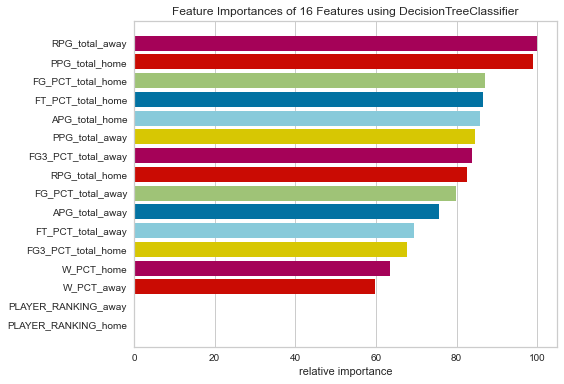

---------------------------------------------
i=1


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       841
           1       0.54      0.47      0.50       514

    accuracy                           0.65      1355
   macro avg       0.62      0.61      0.61      1355
weighted avg       0.64      0.65      0.64      1355



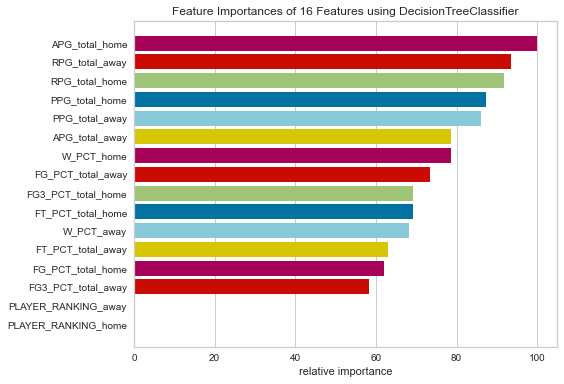

---------------------------------------------
i=2


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       853
           1       0.52      0.51      0.52       502

    accuracy                           0.64      1355
   macro avg       0.62      0.62      0.62      1355
weighted avg       0.64      0.64      0.64      1355



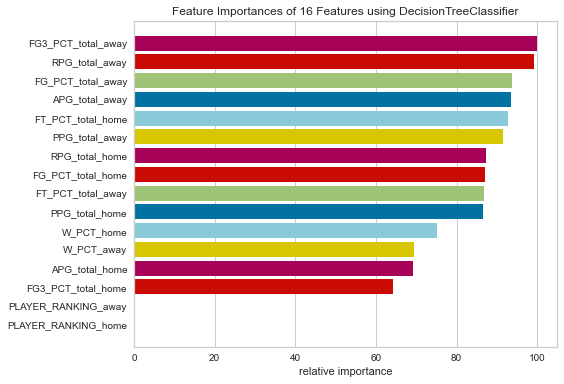

---------------------------------------------
i=3


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       849
           1       0.54      0.50      0.52       505

    accuracy                           0.65      1354
   macro avg       0.63      0.62      0.62      1354
weighted avg       0.65      0.65      0.65      1354



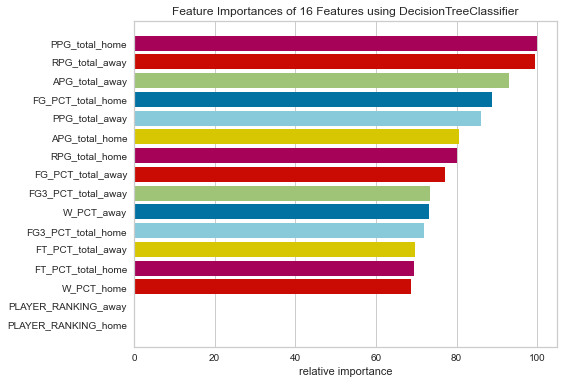

---------------------------------------------
i=4


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       860
           1       0.52      0.51      0.51       494

    accuracy                           0.65      1354
   macro avg       0.62      0.62      0.62      1354
weighted avg       0.65      0.65      0.65      1354



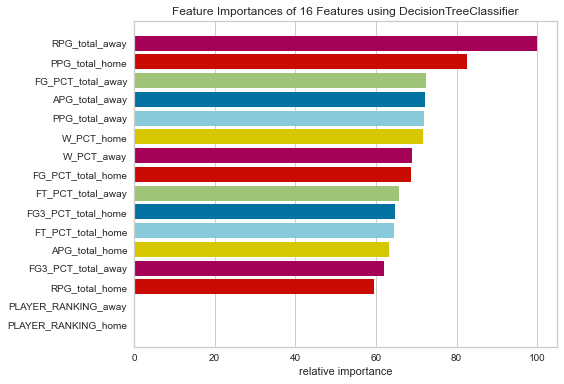

---------------------------------------------
Mean accuracy: 0.6436628930543368
Max accuracy: 0.6528803545051699
Min accuracy: 0.6317343173431734
i=5


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       590
           1       0.52      0.52      0.52       390

    accuracy                           0.62       980
   macro avg       0.60      0.60      0.60       980
weighted avg       0.62      0.62      0.62       980



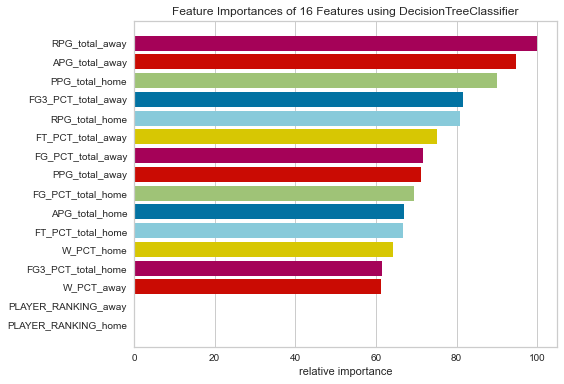

---------------------------------------------
i=6


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       600
           1       0.51      0.56      0.54       380

    accuracy                           0.62       980
   macro avg       0.61      0.61      0.61       980
weighted avg       0.63      0.62      0.63       980



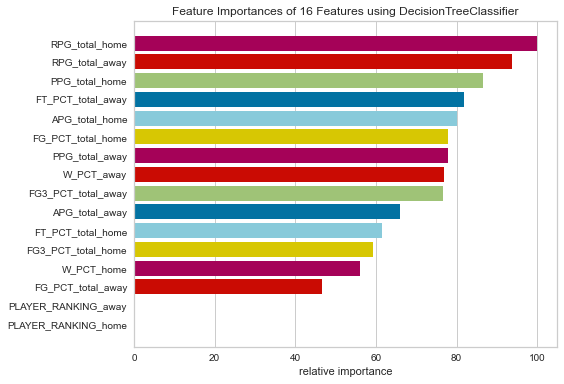

---------------------------------------------
i=7


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       571
           1       0.55      0.53      0.54       409

    accuracy                           0.62       980
   macro avg       0.61      0.61      0.61       980
weighted avg       0.62      0.62      0.62       980



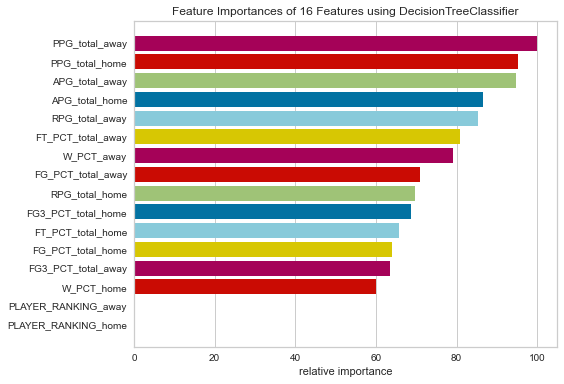

---------------------------------------------
i=8


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       600
           1       0.51      0.49      0.50       380

    accuracy                           0.62       980
   macro avg       0.60      0.59      0.59       980
weighted avg       0.62      0.62      0.62       980



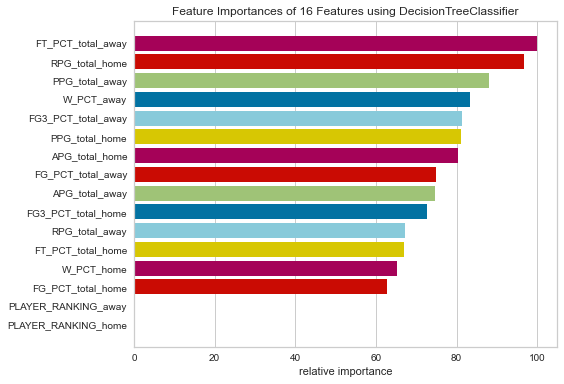

---------------------------------------------
i=9


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       570
           1       0.56      0.53      0.54       410

    accuracy                           0.63       980
   macro avg       0.61      0.61      0.61       980
weighted avg       0.62      0.63      0.63       980



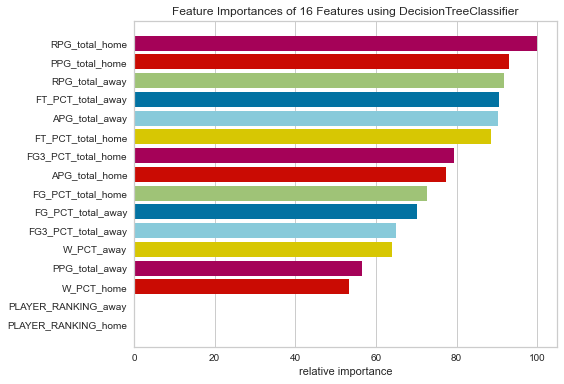

---------------------------------------------
Mean accuracy: 0.6193877551020408
Max accuracy: 0.6234693877551021
Min accuracy: 0.6173469387755102
i=10


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       324
           1       0.53      0.51      0.52       302

    accuracy                           0.55       626
   macro avg       0.55      0.55      0.54       626
weighted avg       0.55      0.55      0.55       626



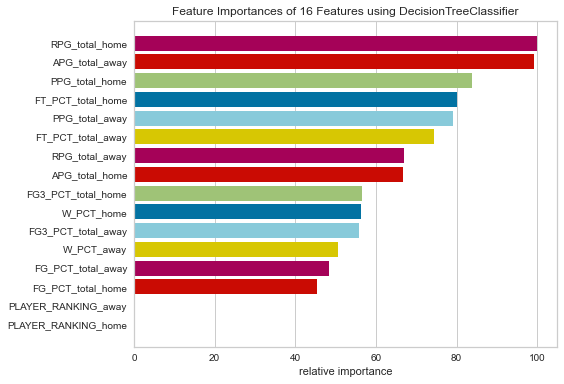

---------------------------------------------
i=11


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.62      0.65      0.63       324
           1       0.60      0.57      0.59       302

    accuracy                           0.61       626
   macro avg       0.61      0.61      0.61       626
weighted avg       0.61      0.61      0.61       626



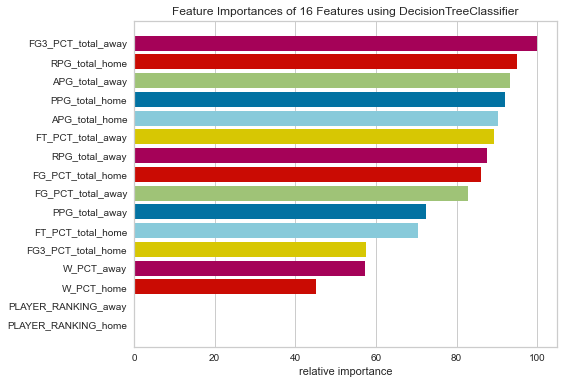

---------------------------------------------
i=12


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       341
           1       0.56      0.59      0.57       285

    accuracy                           0.61       626
   macro avg       0.60      0.60      0.60       626
weighted avg       0.61      0.61      0.61       626



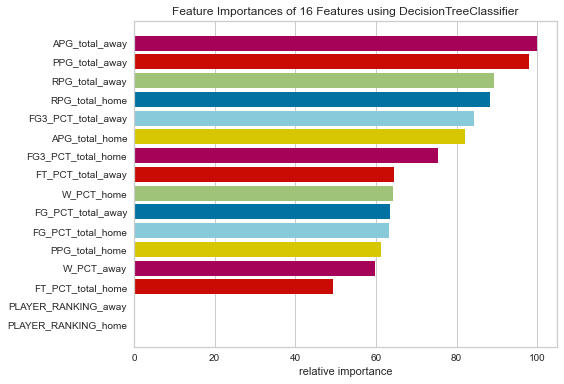

---------------------------------------------
i=13


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.61      0.59       322
           1       0.55      0.50      0.52       303

    accuracy                           0.56       625
   macro avg       0.56      0.55      0.55       625
weighted avg       0.56      0.56      0.56       625



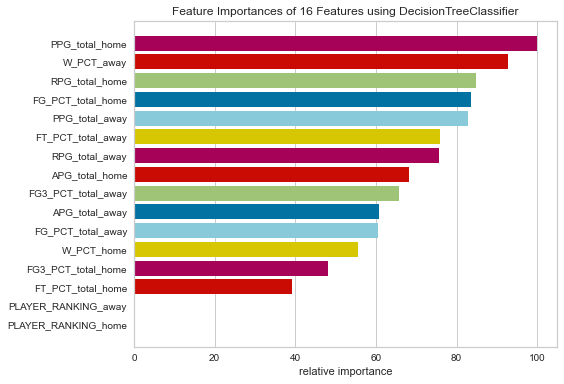

---------------------------------------------
i=14


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.55      0.52      0.53       327
           1       0.50      0.53      0.52       298

    accuracy                           0.52       625
   macro avg       0.53      0.53      0.52       625
weighted avg       0.53      0.52      0.53       625



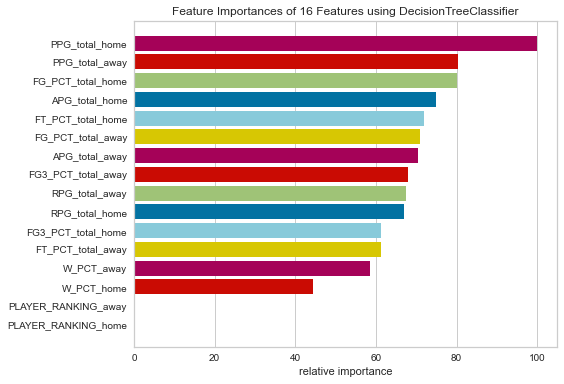

---------------------------------------------
Mean accuracy: 0.5796952076677316
Max accuracy: 0.610223642172524
Min accuracy: 0.5463258785942492
i=15


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.53      0.53      0.53       294
           1       0.60      0.60      0.60       341

    accuracy                           0.57       635
   macro avg       0.56      0.56      0.56       635
weighted avg       0.57      0.57      0.57       635



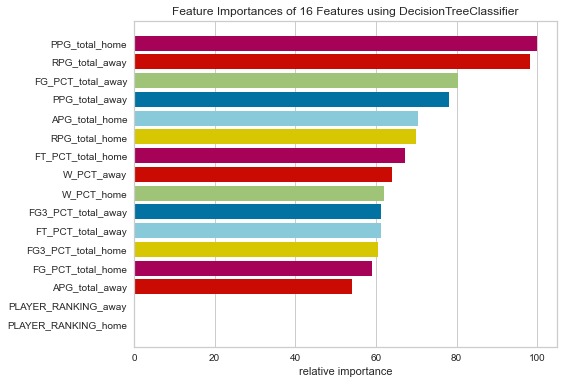

---------------------------------------------
i=16


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.53      0.55       315
           1       0.56      0.59      0.58       319

    accuracy                           0.56       634
   macro avg       0.56      0.56      0.56       634
weighted avg       0.56      0.56      0.56       634



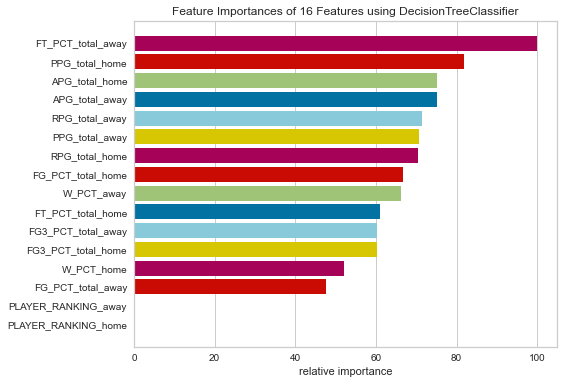

---------------------------------------------
i=17


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.64      0.59      0.61       328
           1       0.59      0.65      0.62       306

    accuracy                           0.62       634
   macro avg       0.62      0.62      0.62       634
weighted avg       0.62      0.62      0.62       634



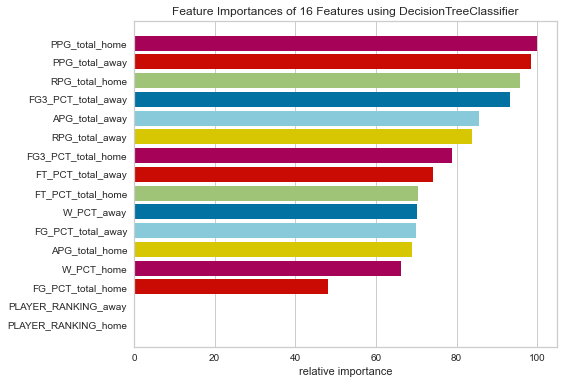

---------------------------------------------
i=18


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       299
           1       0.63      0.61      0.62       335

    accuracy                           0.61       634
   macro avg       0.61      0.61      0.61       634
weighted avg       0.61      0.61      0.61       634



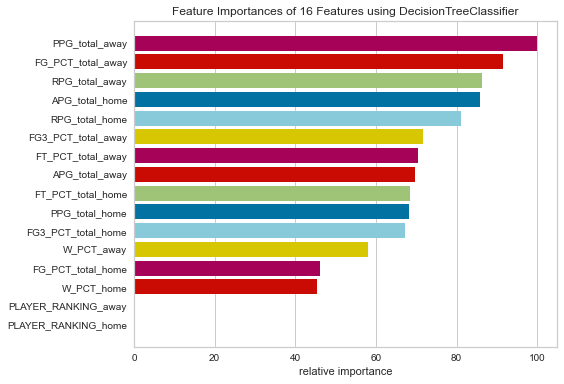

---------------------------------------------
i=19


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.57      0.56       313
           1       0.57      0.56      0.57       321

    accuracy                           0.56       634
   macro avg       0.56      0.56      0.56       634
weighted avg       0.56      0.56      0.56       634



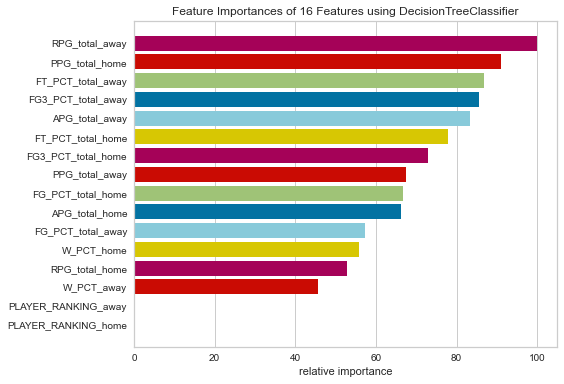

---------------------------------------------
Mean accuracy: 0.5881045232122011
Max accuracy: 0.6167192429022083
Min accuracy: 0.5630914826498423
i=20


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       584
           1       0.54      0.53      0.54       386

    accuracy                           0.63       970
   macro avg       0.62      0.62      0.62       970
weighted avg       0.63      0.63      0.63       970



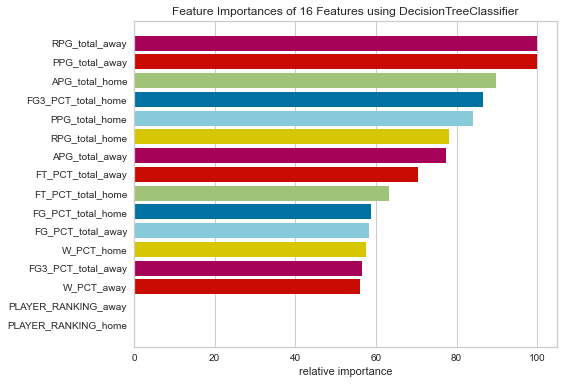

---------------------------------------------
i=21


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       571
           1       0.51      0.47      0.49       399

    accuracy                           0.60       970
   macro avg       0.58      0.58      0.58       970
weighted avg       0.59      0.60      0.60       970



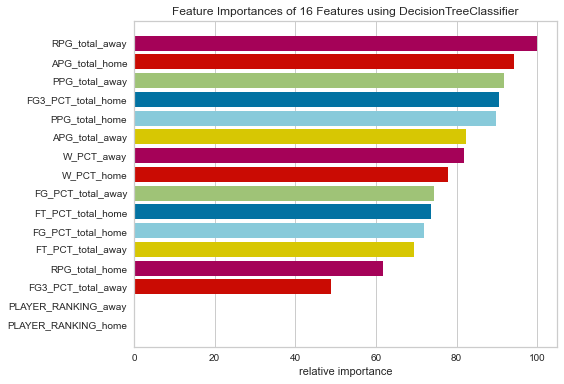

---------------------------------------------
i=22


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       558
           1       0.53      0.55      0.54       411

    accuracy                           0.60       969
   macro avg       0.59      0.59      0.59       969
weighted avg       0.60      0.60      0.60       969



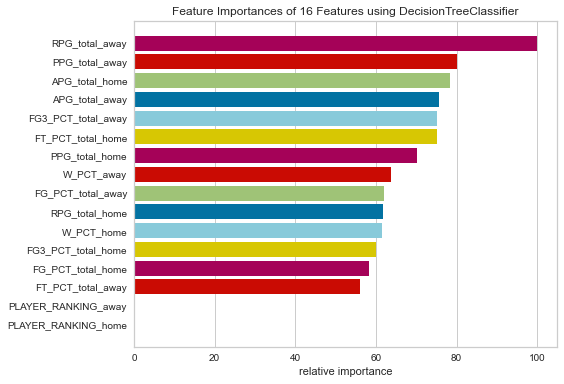

---------------------------------------------
i=23


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       597
           1       0.46      0.48      0.47       372

    accuracy                           0.59       969
   macro avg       0.57      0.57      0.57       969
weighted avg       0.59      0.59      0.59       969



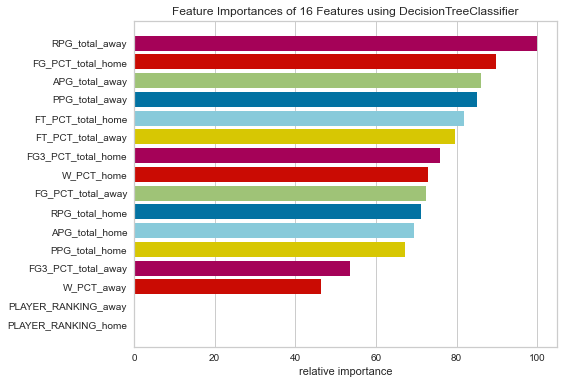

---------------------------------------------
i=24


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       556
           1       0.53      0.49      0.51       413

    accuracy                           0.60       969
   macro avg       0.59      0.59      0.59       969
weighted avg       0.60      0.60      0.60       969



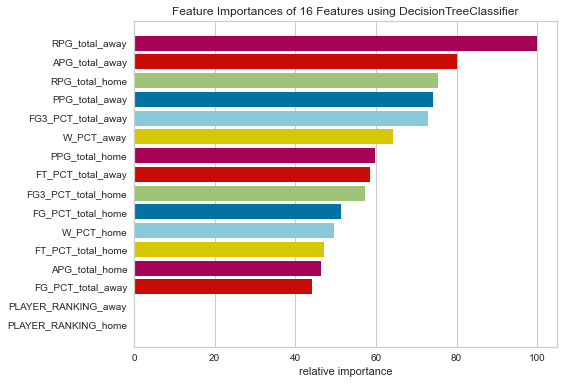

---------------------------------------------
Mean accuracy: 0.6052033130126712
Max accuracy: 0.6329896907216495
Min accuracy: 0.587203302373581
i=25


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       484
           1       0.55      0.51      0.53       358

    accuracy                           0.61       842
   macro avg       0.60      0.60      0.60       842
weighted avg       0.61      0.61      0.61       842



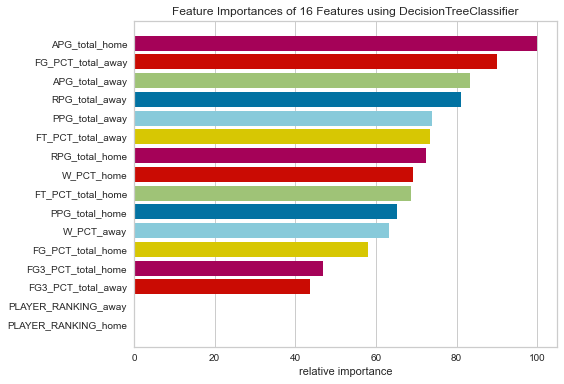

---------------------------------------------
i=26


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.56
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       489
           1       0.47      0.48      0.47       353

    accuracy                           0.56       842
   macro avg       0.55      0.55      0.55       842
weighted avg       0.56      0.56      0.56       842



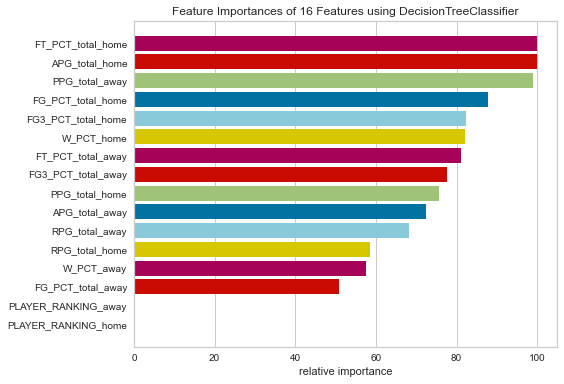

---------------------------------------------
i=27


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       472
           1       0.54      0.53      0.53       369

    accuracy                           0.60       841
   macro avg       0.59      0.59      0.59       841
weighted avg       0.60      0.60      0.60       841



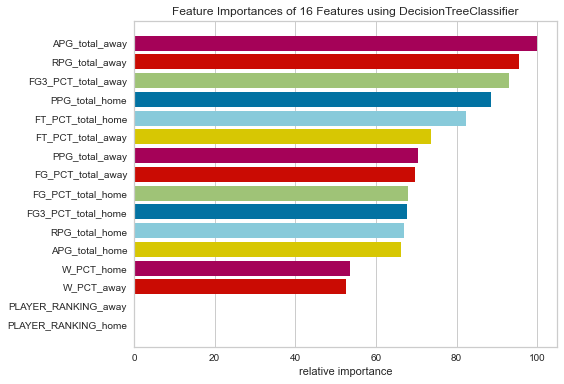

---------------------------------------------
i=28


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       513
           1       0.50      0.55      0.52       328

    accuracy                           0.61       841
   macro avg       0.59      0.60      0.59       841
weighted avg       0.61      0.61      0.61       841



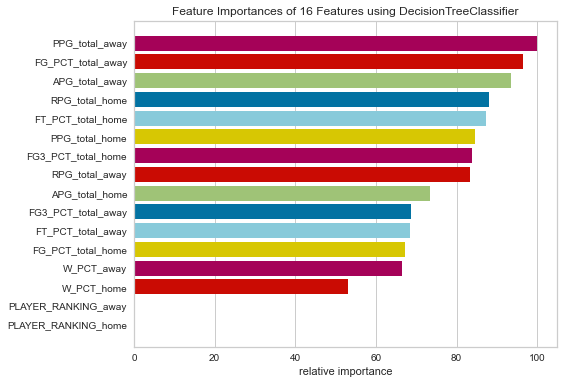

---------------------------------------------
i=29


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       467
           1       0.57      0.57      0.57       374

    accuracy                           0.62       841
   macro avg       0.61      0.62      0.61       841
weighted avg       0.62      0.62      0.62       841



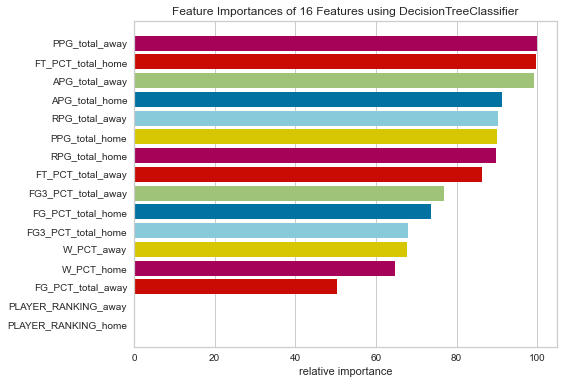

---------------------------------------------
Mean accuracy: 0.5938849520280404
Max accuracy: 0.6140142517814727
Min accuracy: 0.5570071258907363


In [39]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {'criterion':['gini','entropy']})

In [40]:
# plt.figure(figsize=(15,10))
# t = plot_tree(decision_tree_clf)

## Try prune max depth

i=0
WINNER:

Best decision tree accuracy ({'max_depth': 159, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       847
           1       0.51      0.51      0.51       508

    accuracy                           0.63      1355
   macro avg       0.61      0.61      0.61      1355
weighted avg       0.63      0.63      0.63      1355



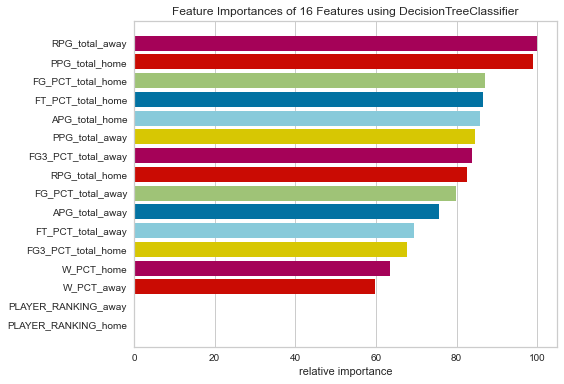

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'max_depth': 243, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       841
           1       0.54      0.47      0.50       514

    accuracy                           0.65      1355
   macro avg       0.62      0.61      0.61      1355
weighted avg       0.64      0.65      0.64      1355



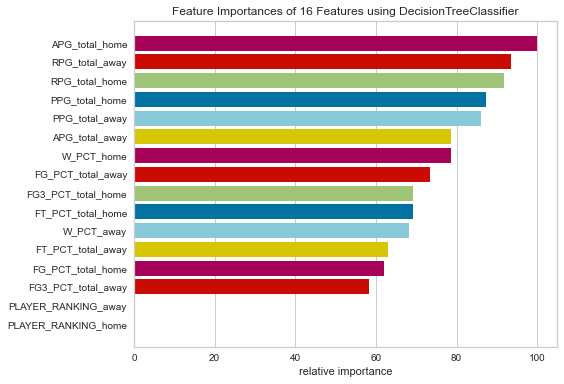

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'max_depth': 646, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       853
           1       0.52      0.51      0.52       502

    accuracy                           0.64      1355
   macro avg       0.62      0.62      0.62      1355
weighted avg       0.64      0.64      0.64      1355



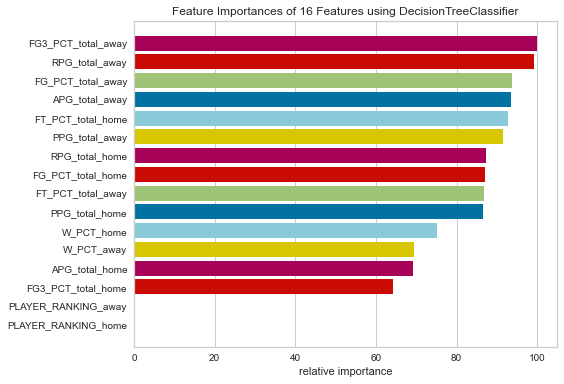

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'max_depth': 20, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.69      0.85      0.76       849
           1       0.57      0.35      0.43       505

    accuracy                           0.66      1354
   macro avg       0.63      0.60      0.60      1354
weighted avg       0.64      0.66      0.64      1354



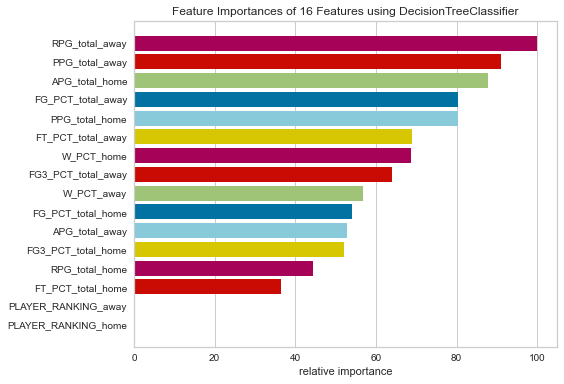

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'max_depth': 35, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       860
           1       0.52      0.51      0.51       494

    accuracy                           0.65      1354
   macro avg       0.62      0.62      0.62      1354
weighted avg       0.65      0.65      0.65      1354



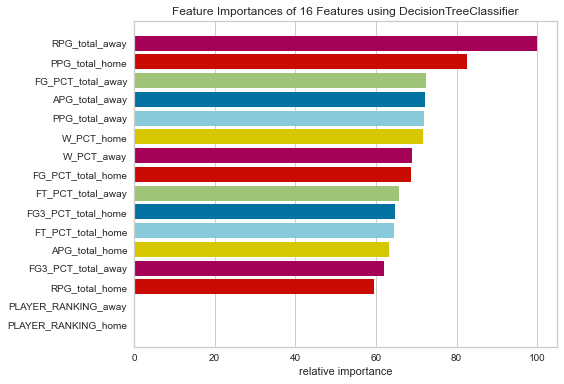

---------------------------------------------
Mean accuracy: 0.6455092741473943
Max accuracy: 0.6602658788774003
Min accuracy: 0.6317343173431734
i=5
FGP:

Best decision tree accuracy ({'max_depth': 263, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       590
           1       0.52      0.52      0.52       390

    accuracy                           0.62       980
   macro avg       0.60      0.60      0.60       980
weighted avg       0.62      0.62      0.62       980



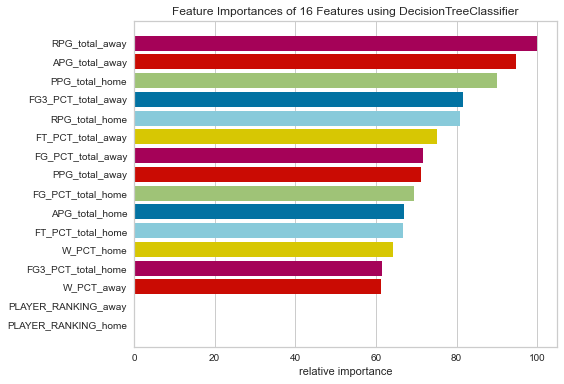

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'max_depth': 865, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       600
           1       0.51      0.56      0.54       380

    accuracy                           0.62       980
   macro avg       0.61      0.61      0.61       980
weighted avg       0.63      0.62      0.63       980



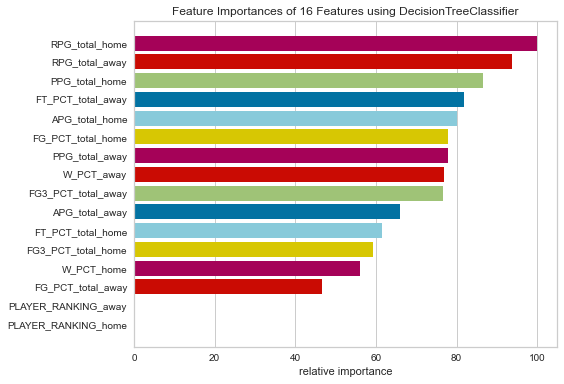

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'max_depth': 307, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       571
           1       0.55      0.53      0.54       409

    accuracy                           0.62       980
   macro avg       0.61      0.61      0.61       980
weighted avg       0.62      0.62      0.62       980



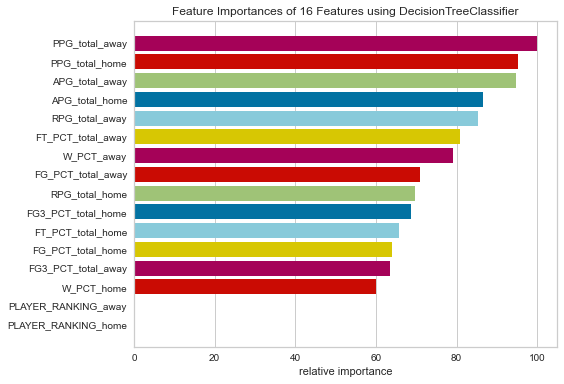

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'max_depth': 820, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       600
           1       0.51      0.49      0.50       380

    accuracy                           0.62       980
   macro avg       0.60      0.59      0.59       980
weighted avg       0.62      0.62      0.62       980



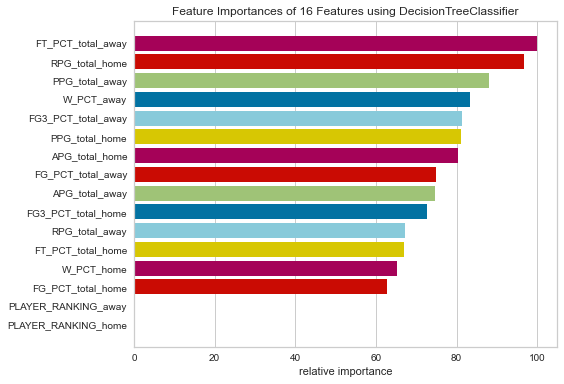

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'max_depth': 131, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       570
           1       0.56      0.53      0.54       410

    accuracy                           0.63       980
   macro avg       0.61      0.61      0.61       980
weighted avg       0.62      0.63      0.63       980



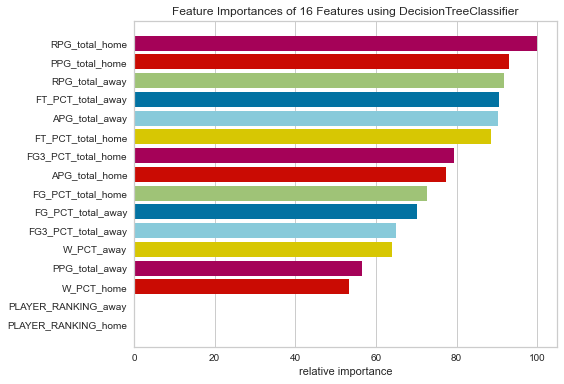

---------------------------------------------
Mean accuracy: 0.6193877551020408
Max accuracy: 0.6234693877551021
Min accuracy: 0.6173469387755102
i=10
FG3:

Best decision tree accuracy ({'max_depth': 584, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       324
           1       0.53      0.51      0.52       302

    accuracy                           0.55       626
   macro avg       0.55      0.55      0.54       626
weighted avg       0.55      0.55      0.55       626



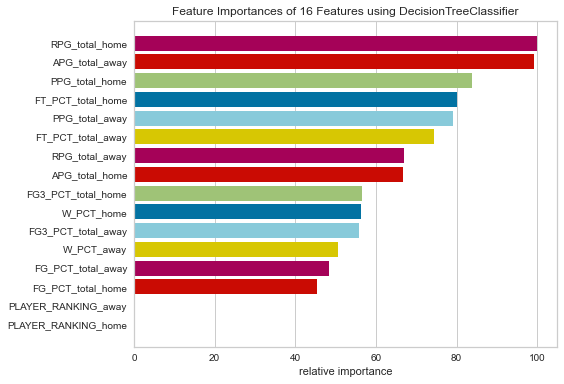

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'max_depth': 116, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.62      0.65      0.63       324
           1       0.60      0.57      0.59       302

    accuracy                           0.61       626
   macro avg       0.61      0.61      0.61       626
weighted avg       0.61      0.61      0.61       626



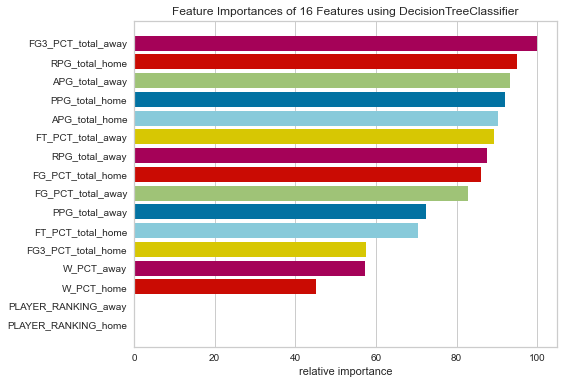

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'max_depth': 757, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       341
           1       0.56      0.59      0.57       285

    accuracy                           0.61       626
   macro avg       0.60      0.60      0.60       626
weighted avg       0.61      0.61      0.61       626



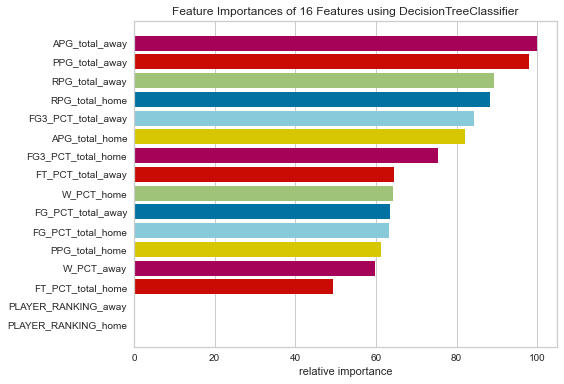

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'max_depth': 655, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.61      0.59       322
           1       0.55      0.50      0.52       303

    accuracy                           0.56       625
   macro avg       0.56      0.55      0.55       625
weighted avg       0.56      0.56      0.56       625



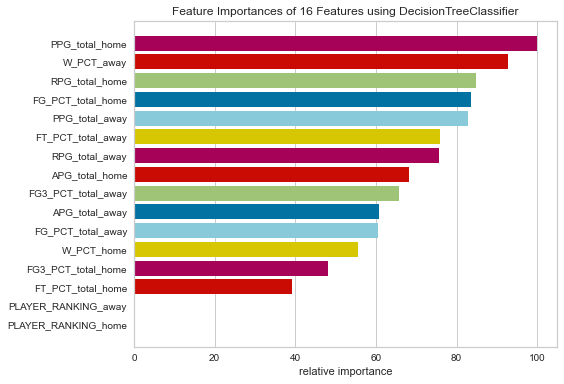

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'max_depth': 17, 'criterion': 'gini'}): 0.54
              precision    recall  f1-score   support

           0       0.55      0.65      0.60       327
           1       0.52      0.42      0.46       298

    accuracy                           0.54       625
   macro avg       0.54      0.54      0.53       625
weighted avg       0.54      0.54      0.53       625



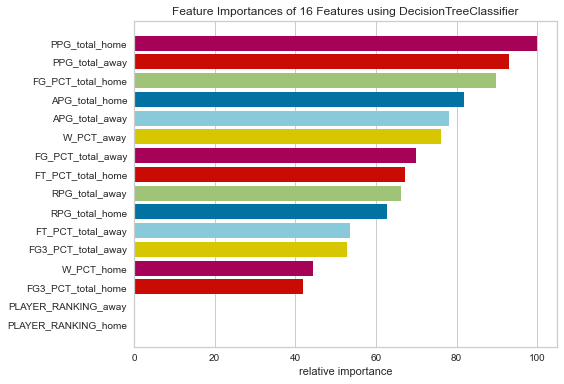

---------------------------------------------
Mean accuracy: 0.5796952076677316
Max accuracy: 0.610223642172524
Min accuracy: 0.5463258785942492
i=15
FT:

Best decision tree accuracy ({'max_depth': 852, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.53      0.53      0.53       294
           1       0.60      0.60      0.60       341

    accuracy                           0.57       635
   macro avg       0.56      0.56      0.56       635
weighted avg       0.57      0.57      0.57       635



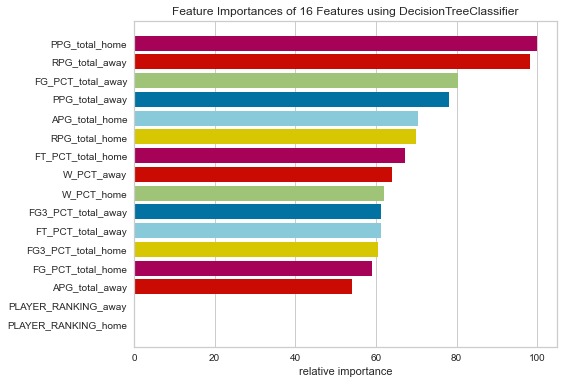

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'max_depth': 922, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.53      0.55       315
           1       0.56      0.59      0.58       319

    accuracy                           0.56       634
   macro avg       0.56      0.56      0.56       634
weighted avg       0.56      0.56      0.56       634



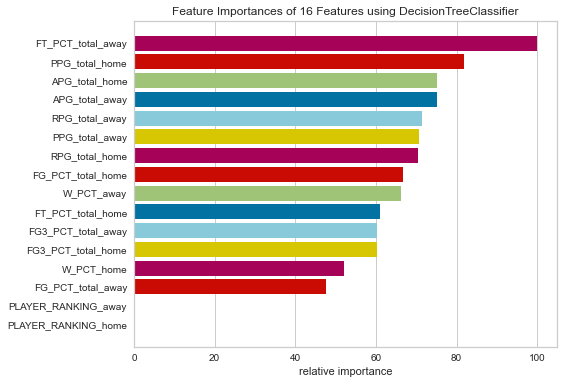

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'max_depth': 798, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.64      0.59      0.61       328
           1       0.59      0.65      0.62       306

    accuracy                           0.62       634
   macro avg       0.62      0.62      0.62       634
weighted avg       0.62      0.62      0.62       634



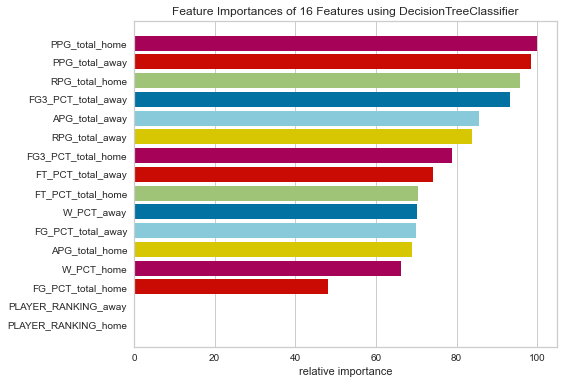

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'max_depth': 954, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       299
           1       0.63      0.61      0.62       335

    accuracy                           0.61       634
   macro avg       0.61      0.61      0.61       634
weighted avg       0.61      0.61      0.61       634



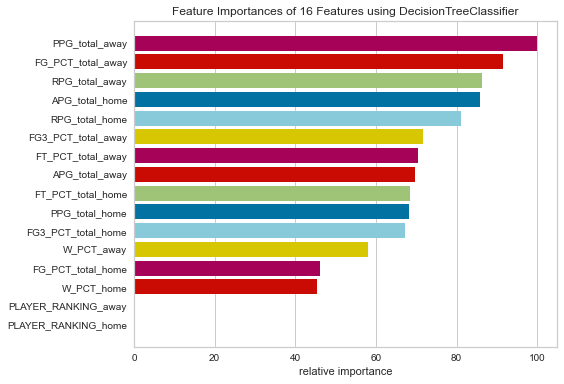

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'max_depth': 23, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.57      0.56       313
           1       0.57      0.56      0.57       321

    accuracy                           0.56       634
   macro avg       0.56      0.56      0.56       634
weighted avg       0.56      0.56      0.56       634



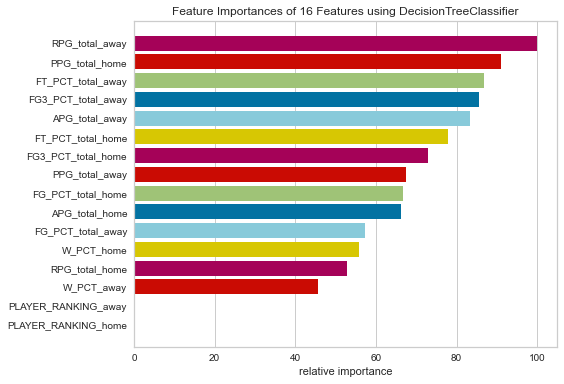

---------------------------------------------
Mean accuracy: 0.5881045232122011
Max accuracy: 0.6167192429022083
Min accuracy: 0.5630914826498423
i=20
AST:

Best decision tree accuracy ({'max_depth': 994, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       584
           1       0.54      0.53      0.54       386

    accuracy                           0.63       970
   macro avg       0.62      0.62      0.62       970
weighted avg       0.63      0.63      0.63       970



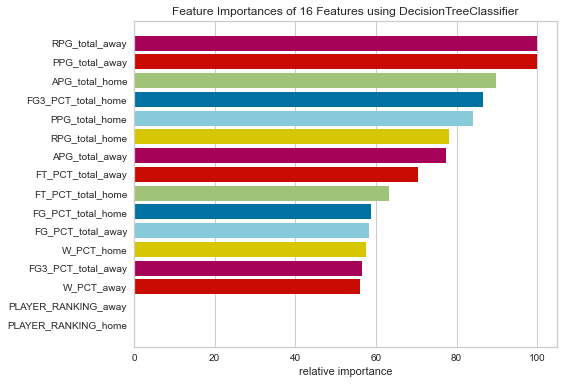

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'max_depth': 582, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       571
           1       0.51      0.47      0.49       399

    accuracy                           0.60       970
   macro avg       0.58      0.58      0.58       970
weighted avg       0.59      0.60      0.60       970



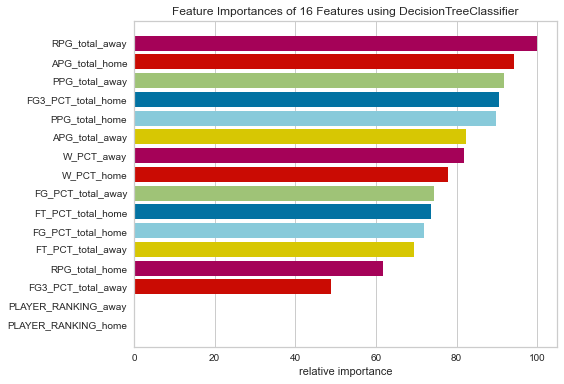

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'max_depth': 797, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       558
           1       0.53      0.55      0.54       411

    accuracy                           0.60       969
   macro avg       0.59      0.59      0.59       969
weighted avg       0.60      0.60      0.60       969



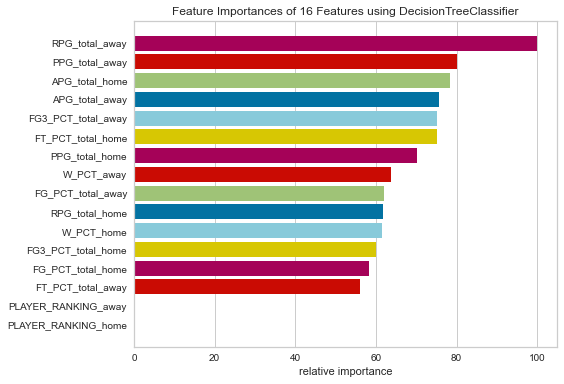

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'max_depth': 236, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       597
           1       0.46      0.48      0.47       372

    accuracy                           0.59       969
   macro avg       0.57      0.57      0.57       969
weighted avg       0.59      0.59      0.59       969



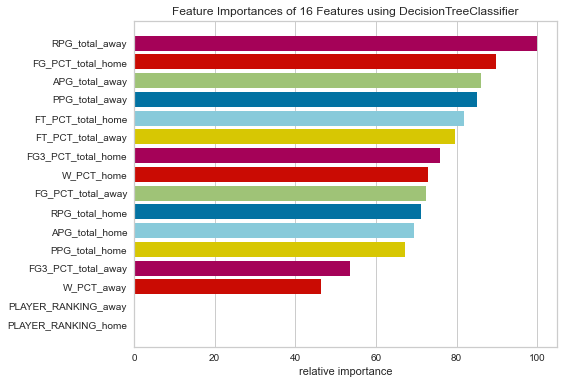

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'max_depth': 422, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       556
           1       0.53      0.49      0.51       413

    accuracy                           0.60       969
   macro avg       0.59      0.59      0.59       969
weighted avg       0.60      0.60      0.60       969



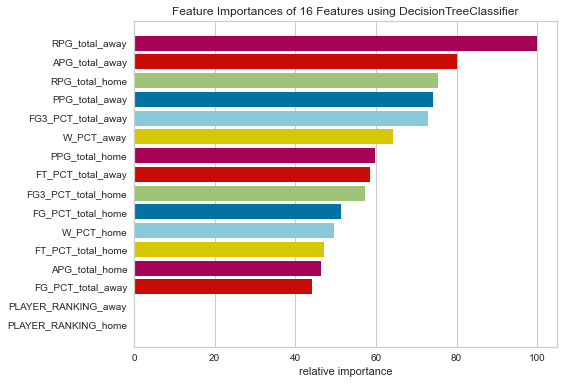

---------------------------------------------
Mean accuracy: 0.6052033130126712
Max accuracy: 0.6329896907216495
Min accuracy: 0.587203302373581
i=25
REB:

Best decision tree accuracy ({'max_depth': 740, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       484
           1       0.55      0.51      0.53       358

    accuracy                           0.61       842
   macro avg       0.60      0.60      0.60       842
weighted avg       0.61      0.61      0.61       842



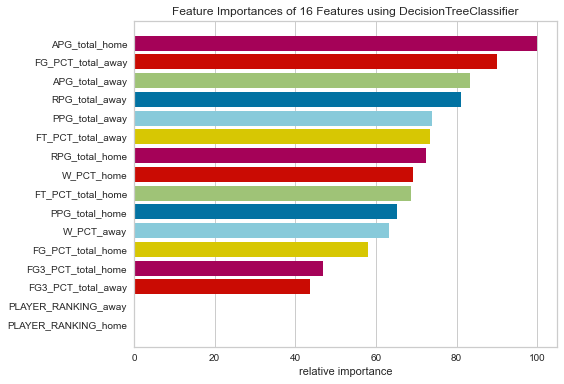

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'max_depth': 425, 'criterion': 'entropy'}): 0.56
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       489
           1       0.47      0.48      0.47       353

    accuracy                           0.56       842
   macro avg       0.55      0.55      0.55       842
weighted avg       0.56      0.56      0.56       842



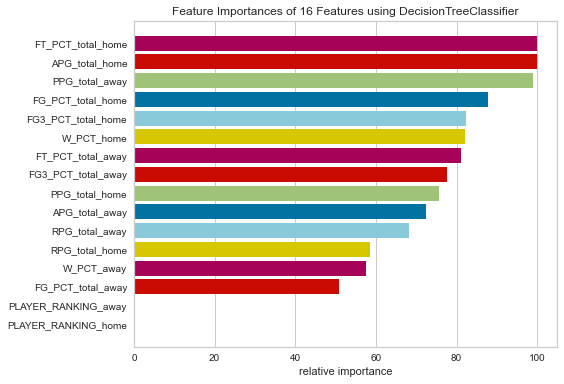

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'max_depth': 137, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       472
           1       0.54      0.53      0.53       369

    accuracy                           0.60       841
   macro avg       0.59      0.59      0.59       841
weighted avg       0.60      0.60      0.60       841



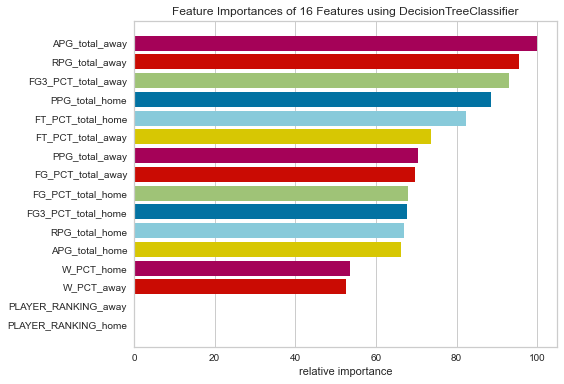

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'max_depth': 176, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       513
           1       0.50      0.55      0.52       328

    accuracy                           0.61       841
   macro avg       0.59      0.60      0.59       841
weighted avg       0.61      0.61      0.61       841



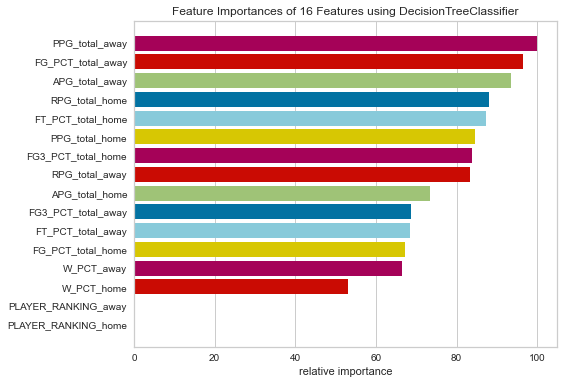

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'max_depth': 825, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       467
           1       0.57      0.57      0.57       374

    accuracy                           0.62       841
   macro avg       0.61      0.62      0.61       841
weighted avg       0.62      0.62      0.62       841



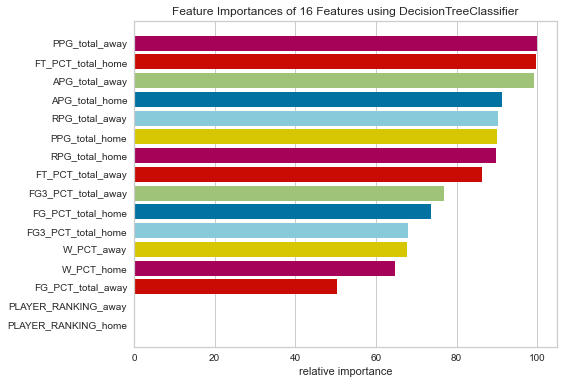

---------------------------------------------
Mean accuracy: 0.5938849520280404
Max accuracy: 0.6140142517814727
Min accuracy: 0.5570071258907363


In [41]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_depth': [*range(4,1000)],
    'criterion': ['gini', 'entropy'],
})

## Try prune impurity decrease

In [42]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'min_impurity_decrease': [0.0,0.01],
#         'criterion': ['gini', 'entropy'],
#     },
# )
# print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
#     'min_impurity_decrease': [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95],
#     'criterion': ['gini', 'entropy'],
# })
# print('Any non-zero min_impurity_decrease causes all classifications to be 1')

## Try prune max leaves

i=0
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 1772, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       847
           1       0.53      0.49      0.51       508

    accuracy                           0.64      1355
   macro avg       0.62      0.61      0.61      1355
weighted avg       0.64      0.64      0.64      1355



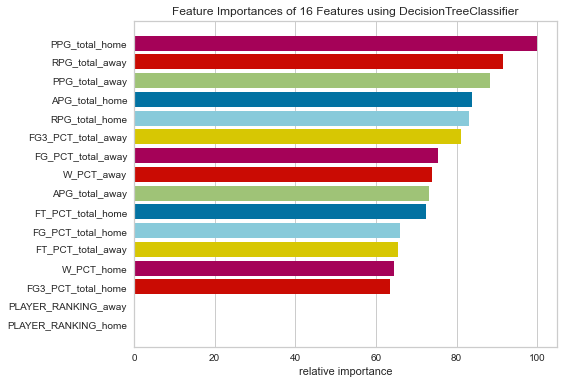

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 1102, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       841
           1       0.55      0.48      0.51       514

    accuracy                           0.66      1355
   macro avg       0.63      0.62      0.62      1355
weighted avg       0.65      0.66      0.65      1355



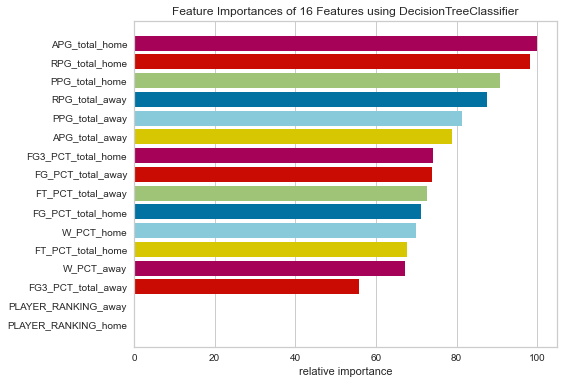

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 668, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       853
           1       0.53      0.50      0.51       502

    accuracy                           0.65      1355
   macro avg       0.62      0.62      0.62      1355
weighted avg       0.64      0.65      0.65      1355



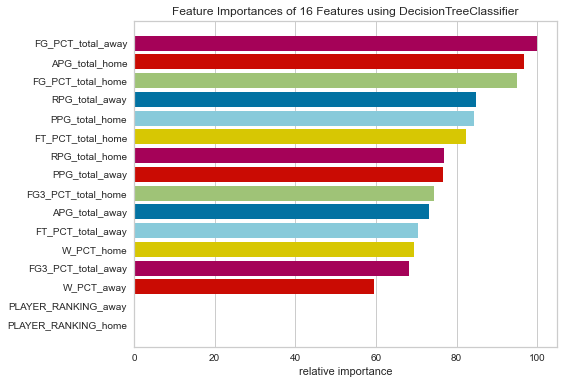

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 878, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       849
           1       0.53      0.52      0.52       505

    accuracy                           0.65      1354
   macro avg       0.62      0.62      0.62      1354
weighted avg       0.65      0.65      0.65      1354



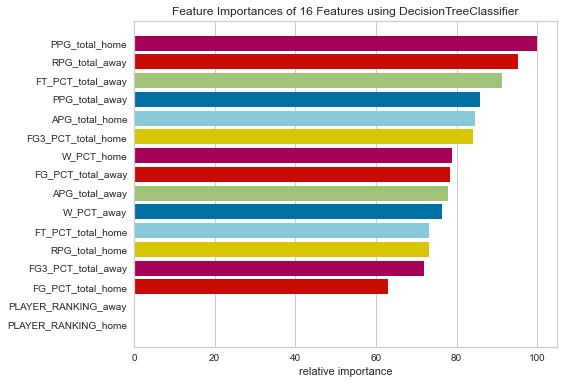

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 142, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       860
           1       0.54      0.34      0.42       494

    accuracy                           0.66      1354
   macro avg       0.62      0.59      0.59      1354
weighted avg       0.64      0.66      0.63      1354



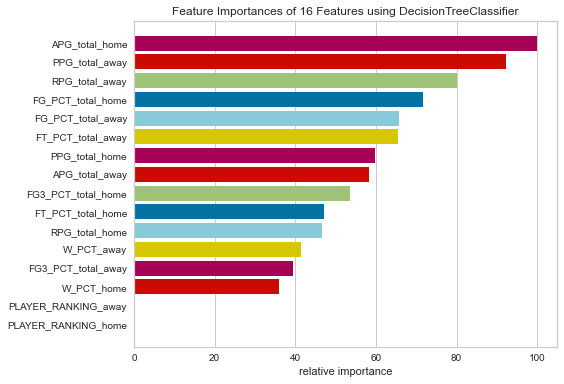

---------------------------------------------
Mean accuracy: 0.6486437615483983
Max accuracy: 0.6553505535055351
Min accuracy: 0.6428044280442804
i=5
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 1666, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       590
           1       0.53      0.50      0.52       390

    accuracy                           0.63       980
   macro avg       0.61      0.61      0.61       980
weighted avg       0.62      0.63      0.63       980



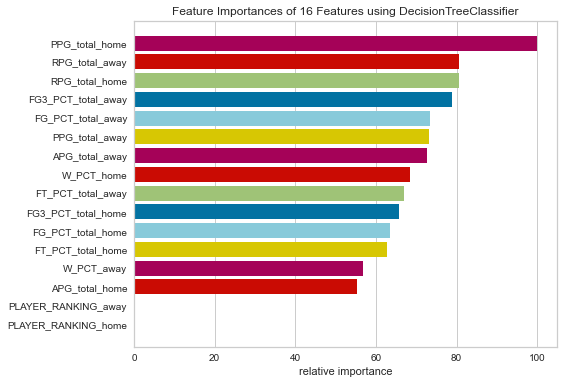

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 1828, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       600
           1       0.50      0.54      0.52       380

    accuracy                           0.62       980
   macro avg       0.60      0.60      0.60       980
weighted avg       0.62      0.62      0.62       980



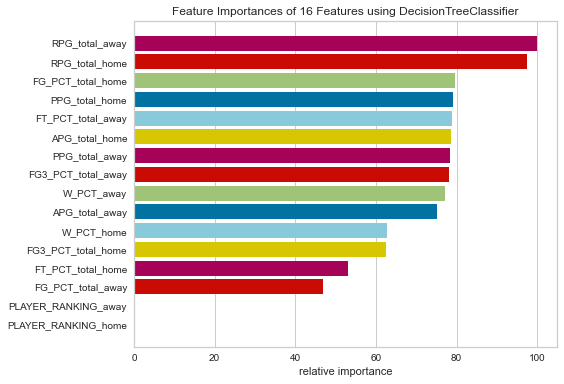

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 1918, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       571
           1       0.56      0.55      0.55       409

    accuracy                           0.63       980
   macro avg       0.62      0.62      0.62       980
weighted avg       0.63      0.63      0.63       980



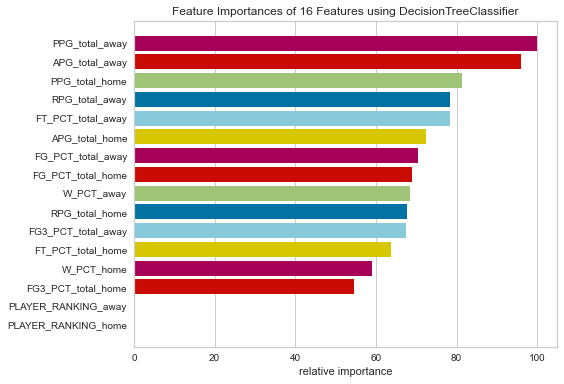

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 1336, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       600
           1       0.49      0.50      0.49       380

    accuracy                           0.61       980
   macro avg       0.59      0.59      0.59       980
weighted avg       0.61      0.61      0.61       980



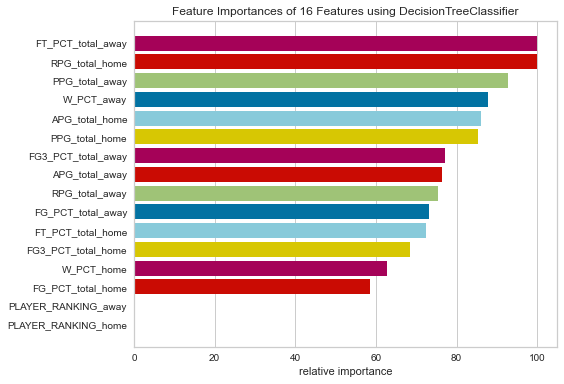

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 1842, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       570
           1       0.56      0.53      0.55       410

    accuracy                           0.63       980
   macro avg       0.62      0.62      0.62       980
weighted avg       0.63      0.63      0.63       980



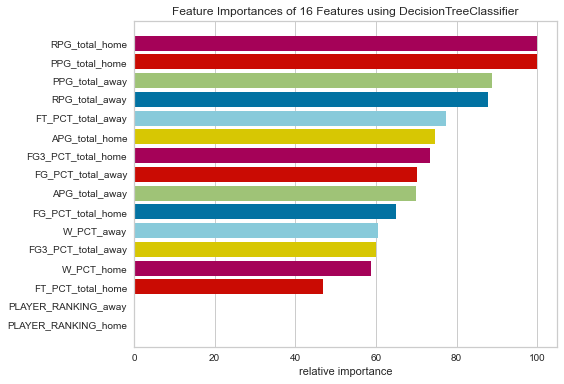

---------------------------------------------
Mean accuracy: 0.6196428571428572
Max accuracy: 0.6285714285714286
Min accuracy: 0.6061224489795919
i=10
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 584, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       324
           1       0.55      0.54      0.55       302

    accuracy                           0.57       626
   macro avg       0.57      0.57      0.57       626
weighted avg       0.57      0.57      0.57       626



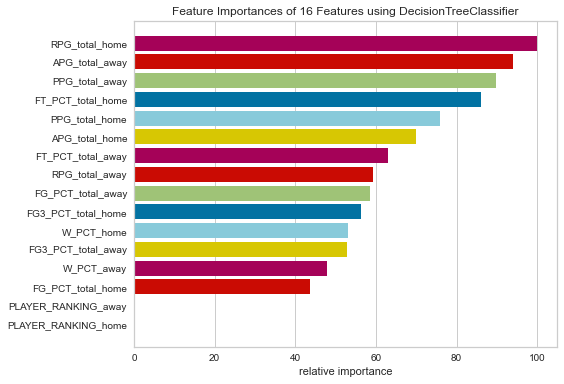

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 270, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.70      0.65       324
           1       0.62      0.52      0.56       302

    accuracy                           0.61       626
   macro avg       0.61      0.61      0.61       626
weighted avg       0.61      0.61      0.61       626



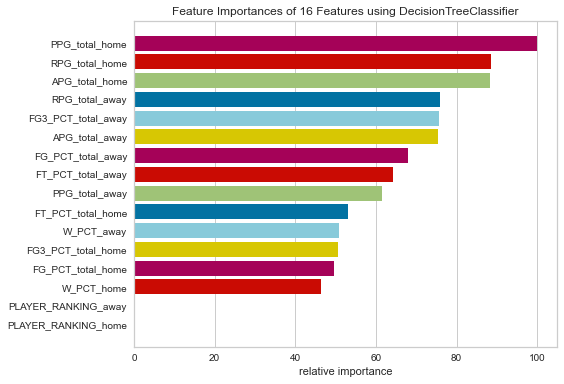

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 1766, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.63      0.62      0.62       341
           1       0.55      0.56      0.55       285

    accuracy                           0.59       626
   macro avg       0.59      0.59      0.59       626
weighted avg       0.59      0.59      0.59       626



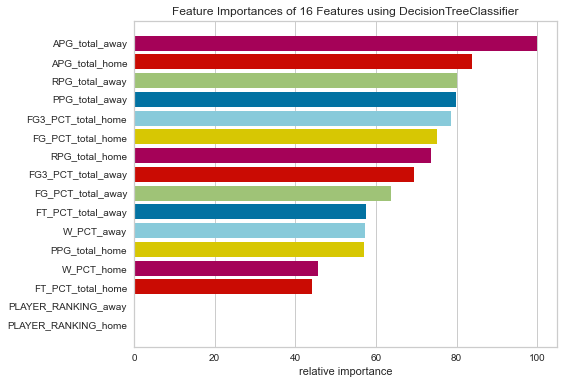

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 466, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.60      0.57      0.59       322
           1       0.57      0.59      0.58       303

    accuracy                           0.58       625
   macro avg       0.58      0.58      0.58       625
weighted avg       0.58      0.58      0.58       625



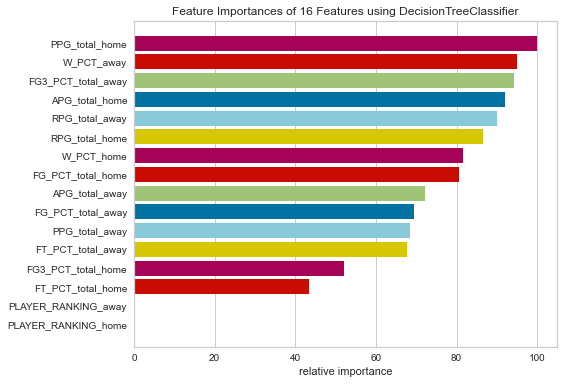

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 1276, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       327
           1       0.52      0.54      0.53       298

    accuracy                           0.55       625
   macro avg       0.55      0.55      0.55       625
weighted avg       0.55      0.55      0.55       625



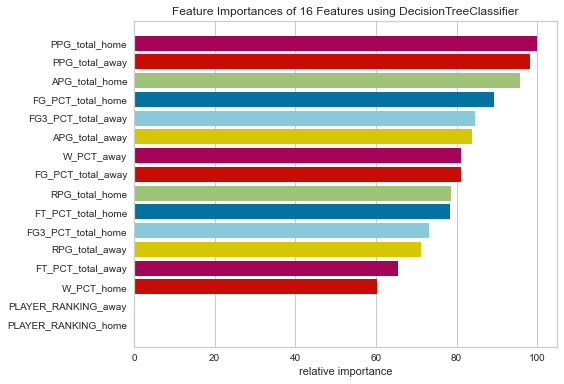

---------------------------------------------
Mean accuracy: 0.5888907348242811
Max accuracy: 0.6118210862619808
Min accuracy: 0.5686900958466453
i=15
FT:

Best decision tree accuracy ({'max_leaf_nodes': 360, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.54      0.52      0.53       294
           1       0.60      0.62      0.61       341

    accuracy                           0.57       635
   macro avg       0.57      0.57      0.57       635
weighted avg       0.57      0.57      0.57       635



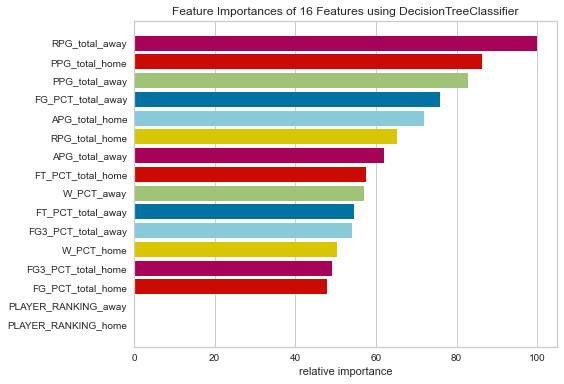

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'max_leaf_nodes': 354, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       315
           1       0.56      0.58      0.57       319

    accuracy                           0.56       634
   macro avg       0.56      0.56      0.56       634
weighted avg       0.56      0.56      0.56       634



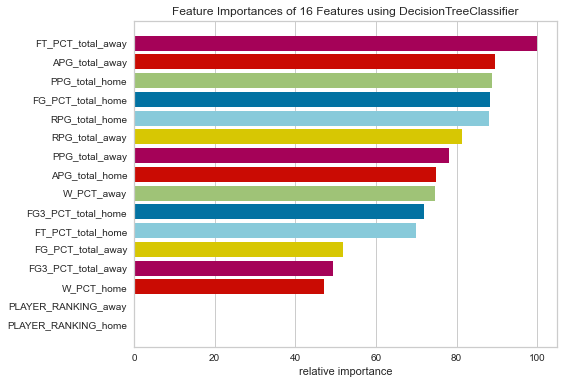

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'max_leaf_nodes': 194, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       328
           1       0.60      0.62      0.61       306

    accuracy                           0.62       634
   macro avg       0.62      0.62      0.62       634
weighted avg       0.62      0.62      0.62       634



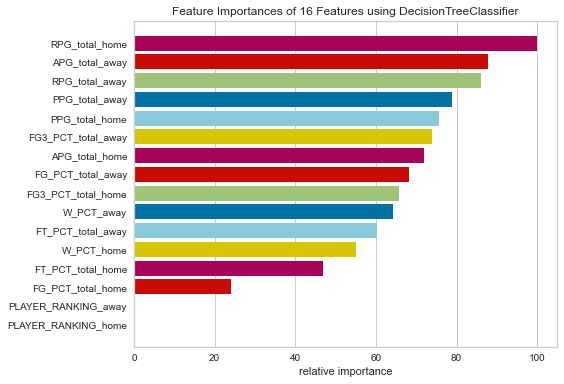

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'max_leaf_nodes': 1224, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       299
           1       0.64      0.61      0.63       335

    accuracy                           0.61       634
   macro avg       0.61      0.61      0.61       634
weighted avg       0.61      0.61      0.61       634



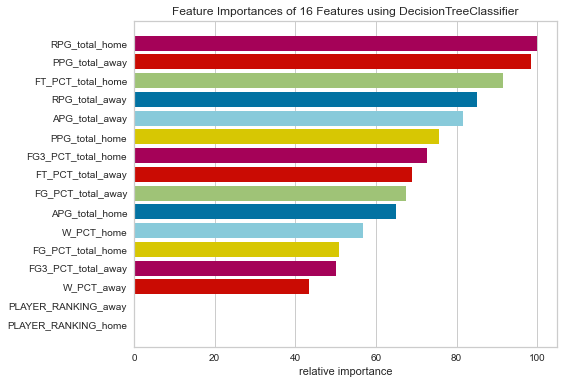

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'max_leaf_nodes': 1692, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       313
           1       0.57      0.55      0.56       321

    accuracy                           0.56       634
   macro avg       0.56      0.56      0.56       634
weighted avg       0.56      0.56      0.56       634



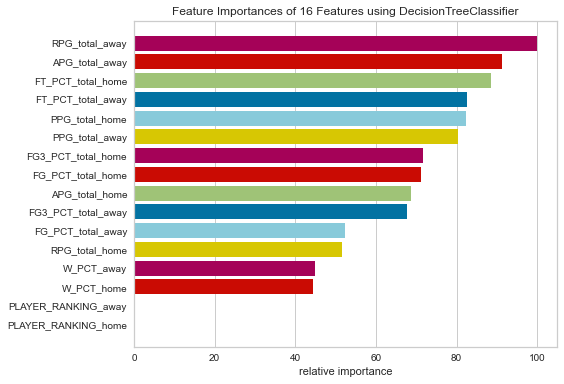

---------------------------------------------
Mean accuracy: 0.5908629126406517
Max accuracy: 0.6167192429022083
Min accuracy: 0.5615141955835962
i=20
AST:

Best decision tree accuracy ({'max_leaf_nodes': 1434, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       584
           1       0.54      0.51      0.52       386

    accuracy                           0.63       970
   macro avg       0.61      0.61      0.61       970
weighted avg       0.63      0.63      0.63       970



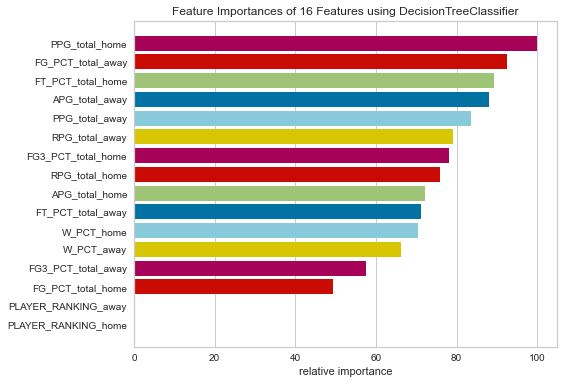

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'max_leaf_nodes': 1806, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       571
           1       0.51      0.48      0.49       399

    accuracy                           0.59       970
   macro avg       0.58      0.58      0.58       970
weighted avg       0.59      0.59      0.59       970



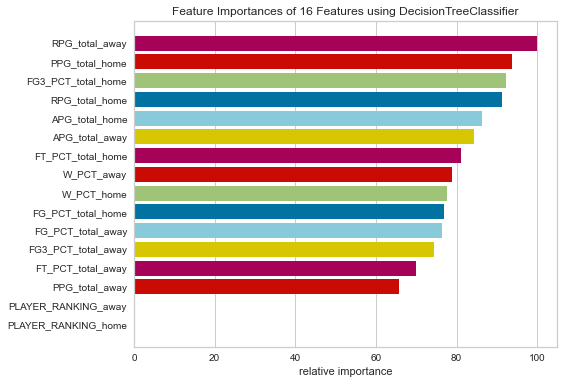

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'max_leaf_nodes': 456, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.65      0.66      0.65       558
           1       0.53      0.52      0.52       411

    accuracy                           0.60       969
   macro avg       0.59      0.59      0.59       969
weighted avg       0.60      0.60      0.60       969



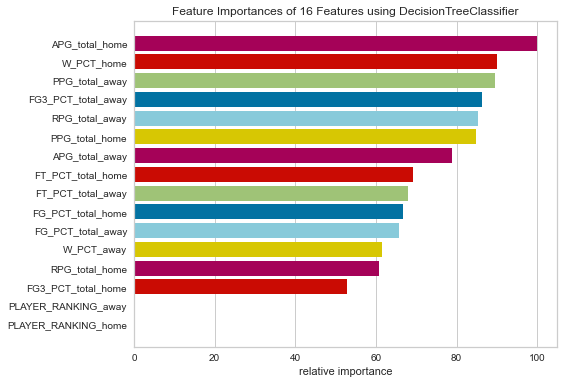

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'max_leaf_nodes': 470, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       597
           1       0.46      0.43      0.45       372

    accuracy                           0.59       969
   macro avg       0.56      0.56      0.56       969
weighted avg       0.58      0.59      0.59       969



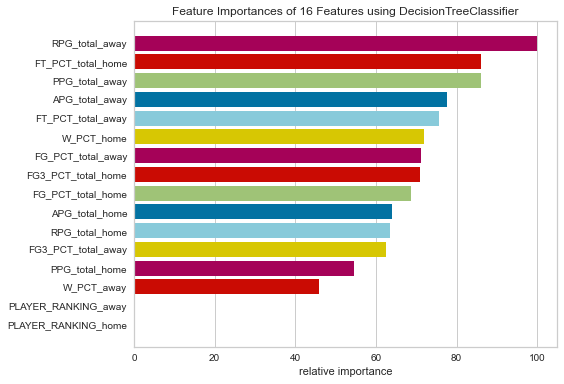

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'max_leaf_nodes': 1748, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       556
           1       0.52      0.49      0.50       413

    accuracy                           0.59       969
   macro avg       0.58      0.58      0.58       969
weighted avg       0.59      0.59      0.59       969



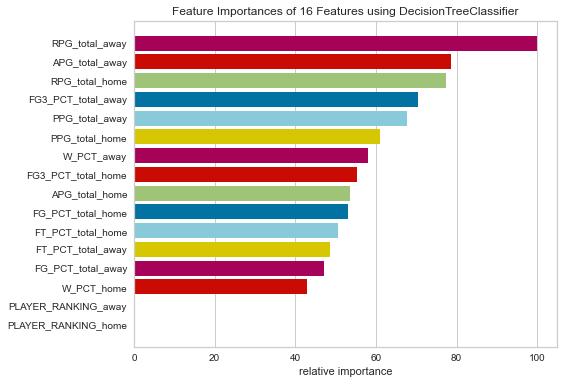

---------------------------------------------
Mean accuracy: 0.6021097315757556
Max accuracy: 0.6288659793814433
Min accuracy: 0.5882352941176471
i=25
REB:

Best decision tree accuracy ({'max_leaf_nodes': 1234, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       484
           1       0.55      0.52      0.53       358

    accuracy                           0.61       842
   macro avg       0.60      0.60      0.60       842
weighted avg       0.61      0.61      0.61       842



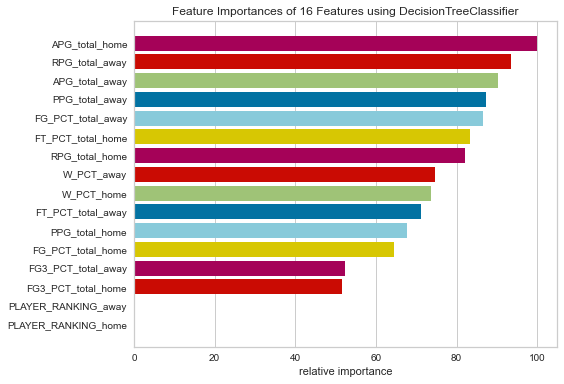

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'max_leaf_nodes': 1904, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.63      0.62      0.63       489
           1       0.49      0.50      0.49       353

    accuracy                           0.57       842
   macro avg       0.56      0.56      0.56       842
weighted avg       0.57      0.57      0.57       842



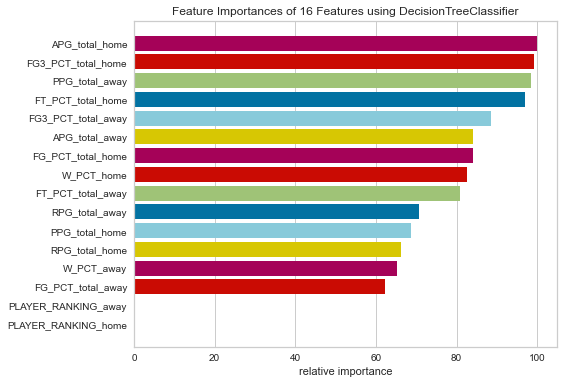

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'max_leaf_nodes': 1380, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.63      0.64      0.63       472
           1       0.53      0.51      0.52       369

    accuracy                           0.59       841
   macro avg       0.58      0.58      0.58       841
weighted avg       0.58      0.59      0.58       841



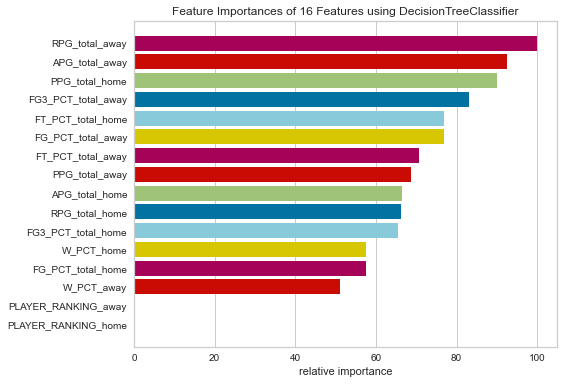

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'max_leaf_nodes': 8, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.63      0.62      0.63       513
           1       0.42      0.44      0.43       328

    accuracy                           0.55       841
   macro avg       0.53      0.53      0.53       841
weighted avg       0.55      0.55      0.55       841



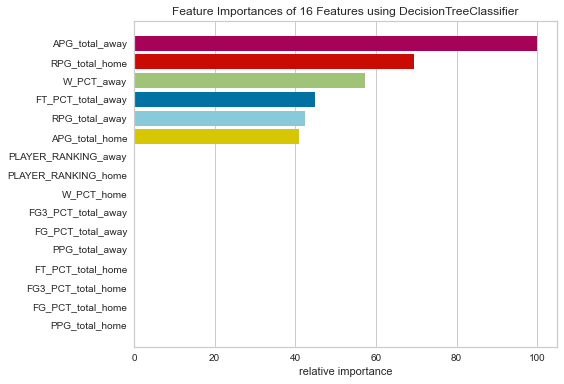

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'max_leaf_nodes': 770, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       467
           1       0.55      0.53      0.54       374

    accuracy                           0.60       841
   macro avg       0.59      0.59      0.59       841
weighted avg       0.60      0.60      0.60       841



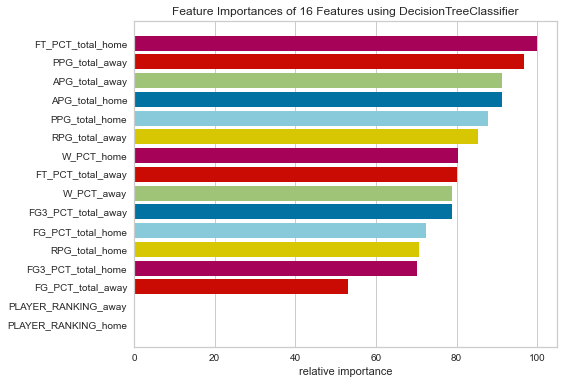

---------------------------------------------
Mean accuracy: 0.5787212514227774
Max accuracy: 0.6116389548693587
Min accuracy: 0.5481569560047562


In [43]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'max_leaf_nodes': [*range(4,60)],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_leaf_nodes': [*range(4,2000,2)],
    'criterion': ['gini', 'entropy'],
})

## Try prune max features

i=0
WINNER:

Best decision tree accuracy ({'max_features': 6, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       847
           1       0.51      0.52      0.52       508

    accuracy                           0.63      1355
   macro avg       0.61      0.61      0.61      1355
weighted avg       0.63      0.63      0.63      1355



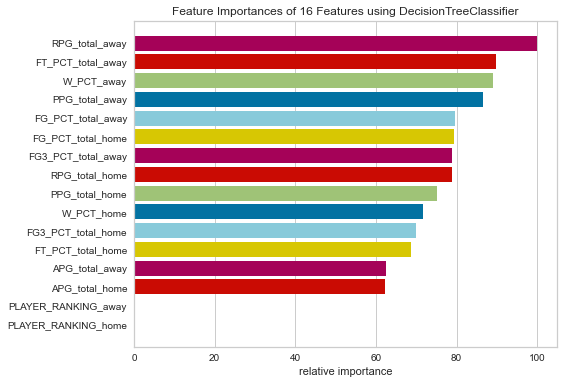

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'max_features': 'log2', 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       841
           1       0.57      0.52      0.54       514

    accuracy                           0.67      1355
   macro avg       0.65      0.64      0.64      1355
weighted avg       0.66      0.67      0.67      1355



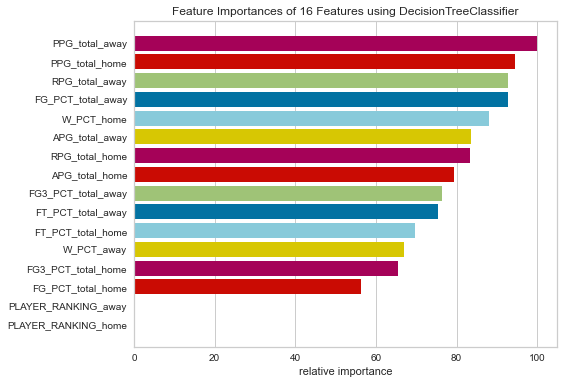

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'max_features': 9, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       853
           1       0.50      0.48      0.49       502

    accuracy                           0.63      1355
   macro avg       0.60      0.60      0.60      1355
weighted avg       0.63      0.63      0.63      1355



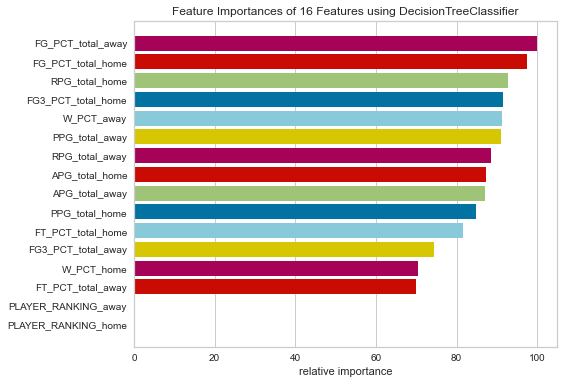

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'max_features': 5, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       849
           1       0.52      0.54      0.53       505

    accuracy                           0.64      1354
   macro avg       0.62      0.62      0.62      1354
weighted avg       0.64      0.64      0.64      1354



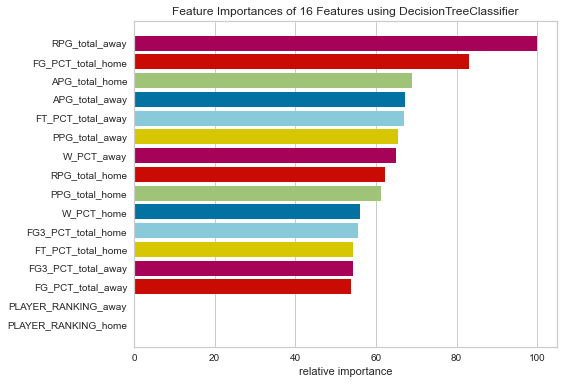

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       860
           1       0.53      0.51      0.52       494

    accuracy                           0.66      1354
   macro avg       0.63      0.62      0.63      1354
weighted avg       0.65      0.66      0.65      1354



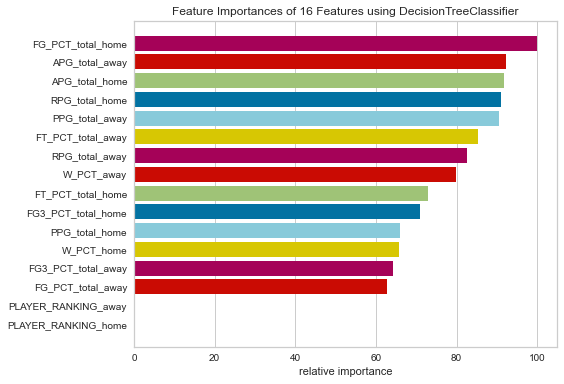

---------------------------------------------
Mean accuracy: 0.6432919816642775
Max accuracy: 0.6701107011070111
Min accuracy: 0.6280442804428045
i=5
FGP:

Best decision tree accuracy ({'max_features': 5, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       590
           1       0.53      0.53      0.53       390

    accuracy                           0.62       980
   macro avg       0.61      0.61      0.61       980
weighted avg       0.62      0.62      0.62       980



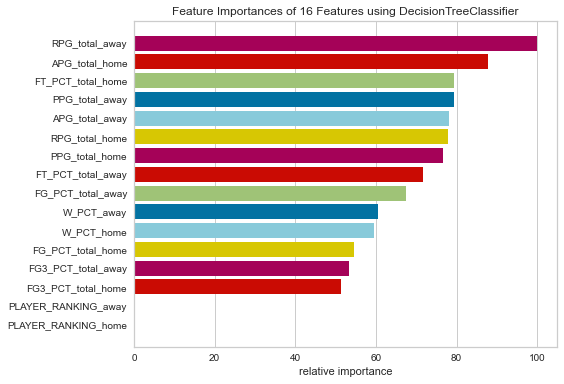

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'max_features': 12, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       600
           1       0.48      0.48      0.48       380

    accuracy                           0.60       980
   macro avg       0.58      0.58      0.58       980
weighted avg       0.60      0.60      0.60       980



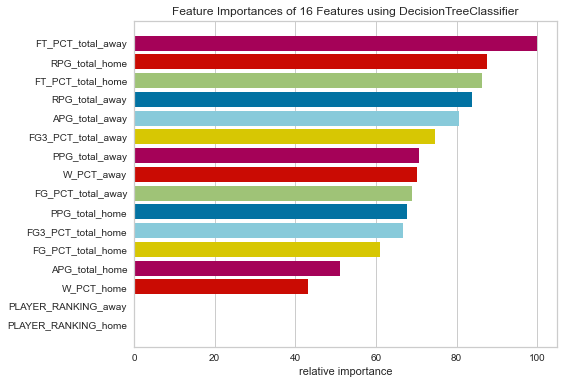

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'max_features': 1, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       571
           1       0.50      0.47      0.49       409

    accuracy                           0.59       980
   macro avg       0.57      0.57      0.57       980
weighted avg       0.58      0.59      0.58       980



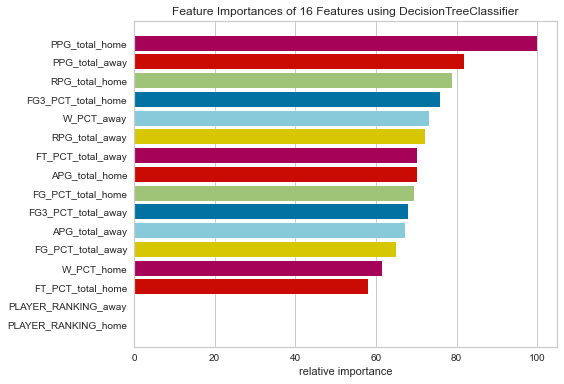

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'max_features': 11, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       600
           1       0.49      0.52      0.50       380

    accuracy                           0.61       980
   macro avg       0.59      0.59      0.59       980
weighted avg       0.61      0.61      0.61       980



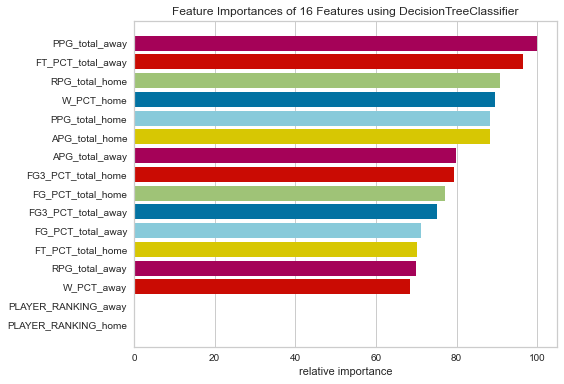

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'max_features': 8, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       570
           1       0.53      0.51      0.52       410

    accuracy                           0.60       980
   macro avg       0.59      0.59      0.59       980
weighted avg       0.60      0.60      0.60       980



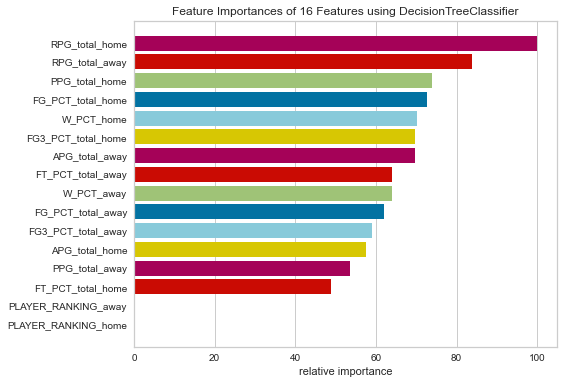

---------------------------------------------
Mean accuracy: 0.6030612244897959
Max accuracy: 0.6234693877551021
Min accuracy: 0.5857142857142857
i=10
FG3:

Best decision tree accuracy ({'max_features': None, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       324
           1       0.53      0.51      0.52       302

    accuracy                           0.55       626
   macro avg       0.55      0.55      0.54       626
weighted avg       0.55      0.55      0.55       626



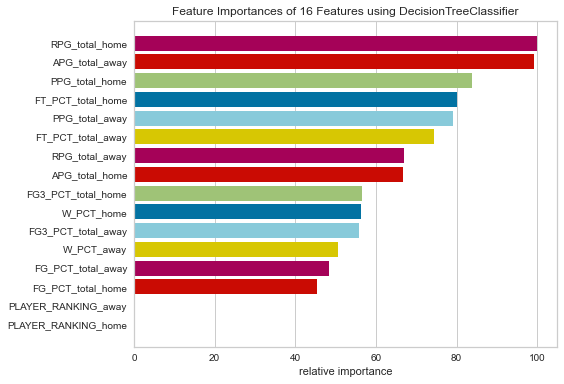

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'max_features': 12, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       324
           1       0.60      0.58      0.59       302

    accuracy                           0.61       626
   macro avg       0.61      0.61      0.61       626
weighted avg       0.61      0.61      0.61       626



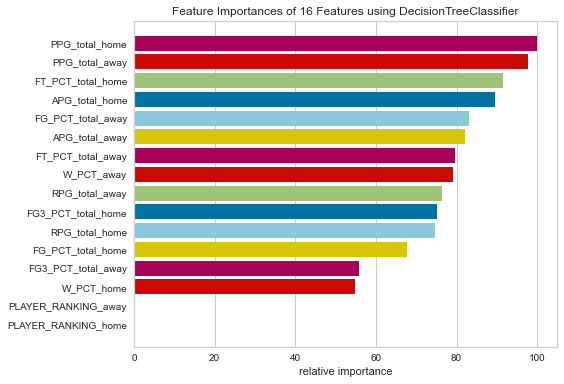

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'max_features': 9, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.66      0.61      0.63       341
           1       0.57      0.62      0.59       285

    accuracy                           0.61       626
   macro avg       0.61      0.61      0.61       626
weighted avg       0.62      0.61      0.61       626



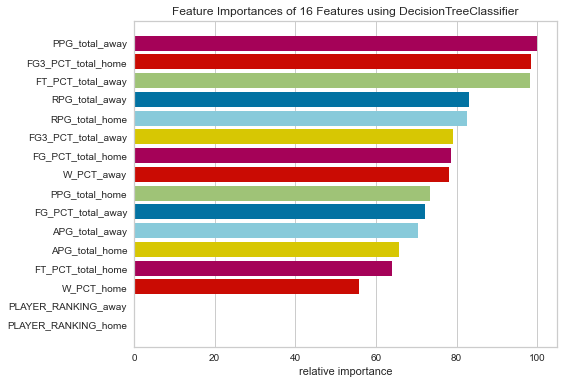

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'max_features': 10, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       322
           1       0.57      0.53      0.55       303

    accuracy                           0.57       625
   macro avg       0.57      0.57      0.57       625
weighted avg       0.57      0.57      0.57       625



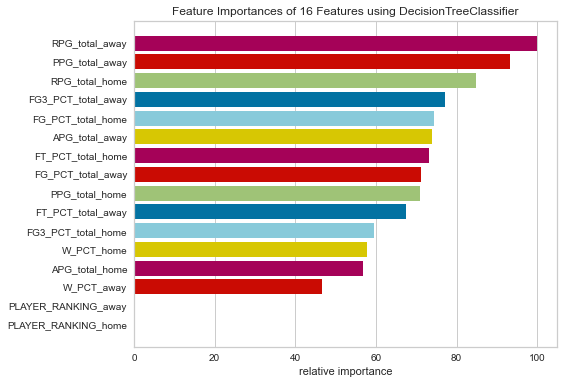

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'max_features': 9, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       327
           1       0.53      0.53      0.53       298

    accuracy                           0.56       625
   macro avg       0.55      0.55      0.55       625
weighted avg       0.56      0.56      0.56       625



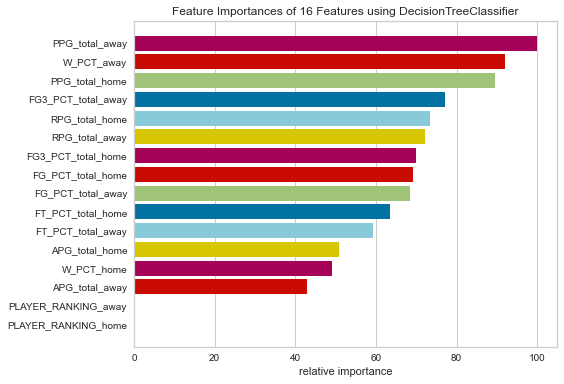

---------------------------------------------
Mean accuracy: 0.5860920127795528
Max accuracy: 0.6134185303514377
Min accuracy: 0.5463258785942492
i=15
FT:

Best decision tree accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.53      0.60      0.56       294
           1       0.61      0.54      0.57       341

    accuracy                           0.57       635
   macro avg       0.57      0.57      0.57       635
weighted avg       0.57      0.57      0.57       635



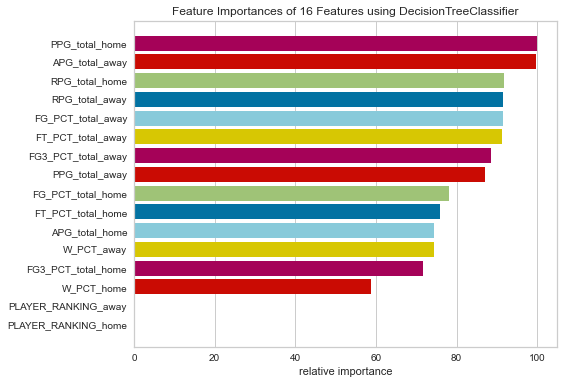

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'max_features': 11, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.50      0.53       315
           1       0.55      0.60      0.57       319

    accuracy                           0.55       634
   macro avg       0.55      0.55      0.55       634
weighted avg       0.55      0.55      0.55       634



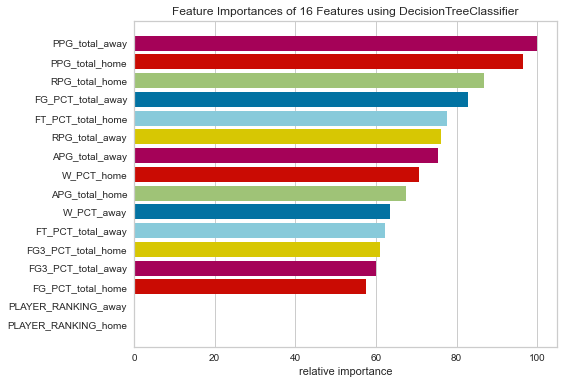

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.62      0.59      0.60       328
           1       0.58      0.61      0.60       306

    accuracy                           0.60       634
   macro avg       0.60      0.60      0.60       634
weighted avg       0.60      0.60      0.60       634



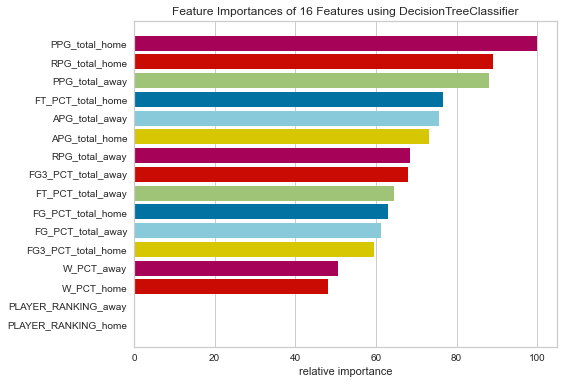

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'max_features': 5, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       299
           1       0.62      0.63      0.62       335

    accuracy                           0.60       634
   macro avg       0.60      0.60      0.60       634
weighted avg       0.60      0.60      0.60       634



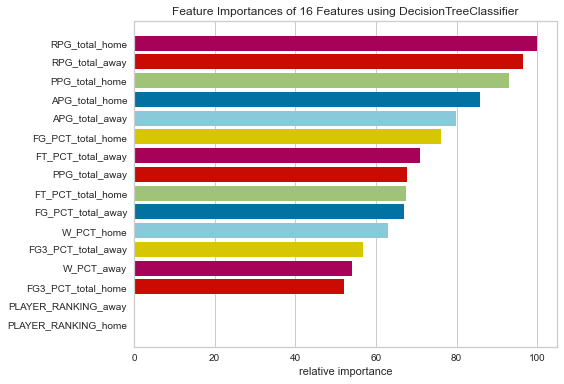

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'max_features': 4, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.57      0.50      0.54       313
           1       0.57      0.63      0.60       321

    accuracy                           0.57       634
   macro avg       0.57      0.57      0.57       634
weighted avg       0.57      0.57      0.57       634



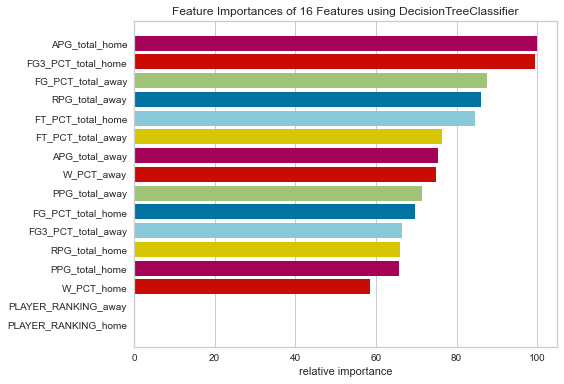

---------------------------------------------
Mean accuracy: 0.5794300653270077
Max accuracy: 0.6025236593059937
Min accuracy: 0.5504731861198738
i=20
AST:

Best decision tree accuracy ({'max_features': 2, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       584
           1       0.52      0.54      0.53       386

    accuracy                           0.62       970
   macro avg       0.60      0.60      0.60       970
weighted avg       0.62      0.62      0.62       970



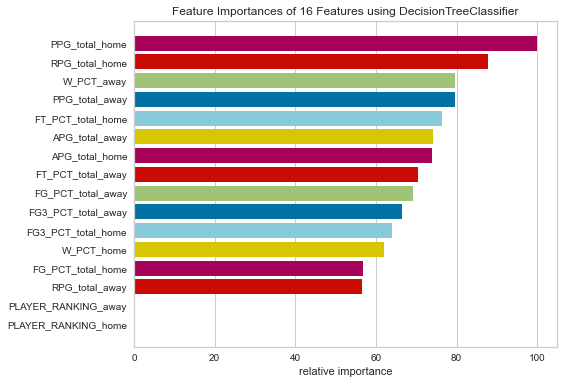

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'max_features': 10, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       571
           1       0.51      0.48      0.49       399

    accuracy                           0.60       970
   macro avg       0.58      0.58      0.58       970
weighted avg       0.60      0.60      0.60       970



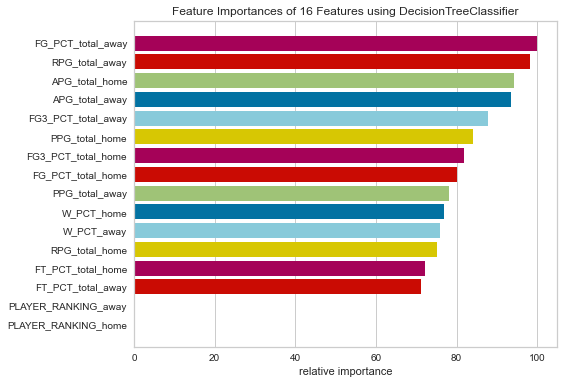

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'max_features': 5, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.66      0.71      0.69       558
           1       0.56      0.51      0.54       411

    accuracy                           0.63       969
   macro avg       0.61      0.61      0.61       969
weighted avg       0.62      0.63      0.62       969



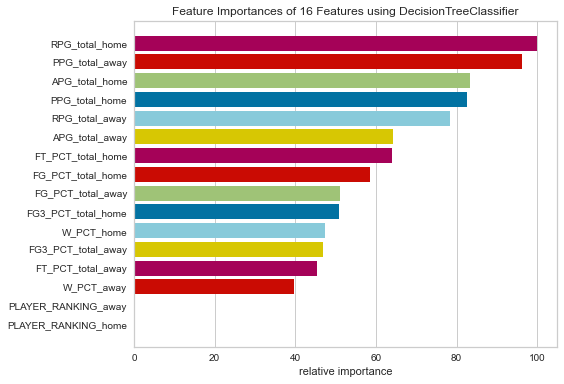

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'max_features': 8, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.70      0.69      0.70       597
           1       0.51      0.52      0.52       372

    accuracy                           0.63       969
   macro avg       0.61      0.61      0.61       969
weighted avg       0.63      0.63      0.63       969



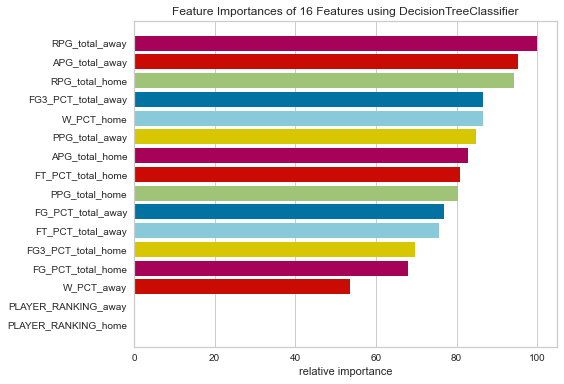

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.63      0.66      0.64       556
           1       0.51      0.48      0.49       413

    accuracy                           0.58       969
   macro avg       0.57      0.57      0.57       969
weighted avg       0.58      0.58      0.58       969



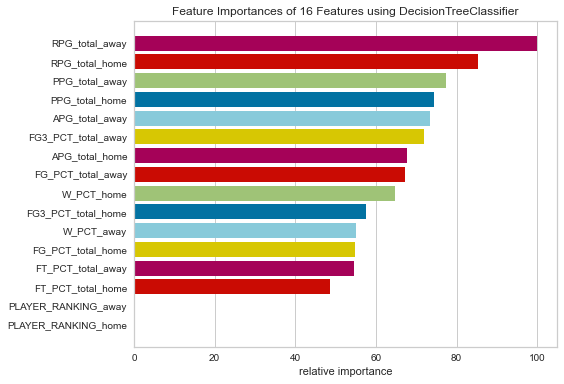

---------------------------------------------
Mean accuracy: 0.6175906716457609
Max accuracy: 0.6264189886480909
Min accuracy: 0.6
i=25
REB:

Best decision tree accuracy ({'max_features': 'sqrt', 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       484
           1       0.55      0.53      0.54       358

    accuracy                           0.62       842
   macro avg       0.61      0.61      0.61       842
weighted avg       0.62      0.62      0.62       842



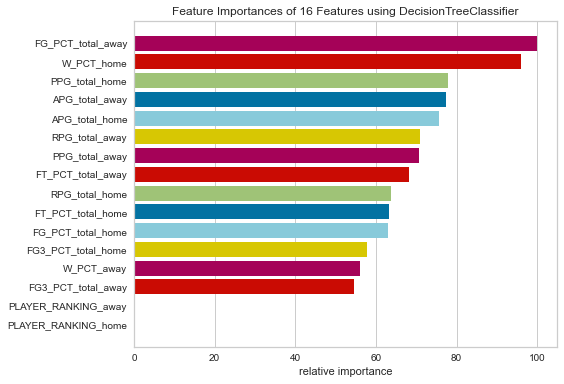

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'entropy'}): 0.56
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       489
           1       0.48      0.48      0.48       353

    accuracy                           0.56       842
   macro avg       0.55      0.55      0.55       842
weighted avg       0.56      0.56      0.56       842



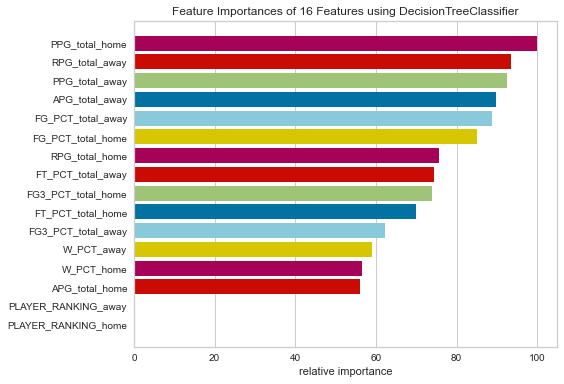

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'max_features': 5, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       472
           1       0.59      0.53      0.56       369

    accuracy                           0.63       841
   macro avg       0.63      0.62      0.62       841
weighted avg       0.63      0.63      0.63       841



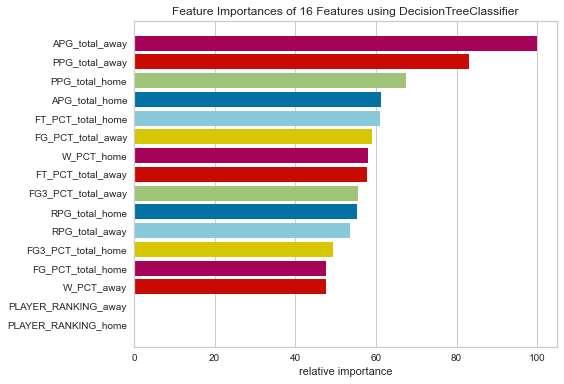

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'max_features': None, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       513
           1       0.50      0.55      0.52       328

    accuracy                           0.61       841
   macro avg       0.59      0.60      0.59       841
weighted avg       0.61      0.61      0.61       841



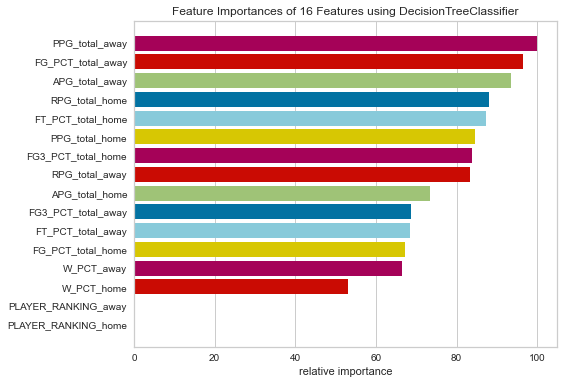

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'max_features': 9, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       467
           1       0.58      0.56      0.57       374

    accuracy                           0.63       841
   macro avg       0.62      0.62      0.62       841
weighted avg       0.62      0.63      0.62       841



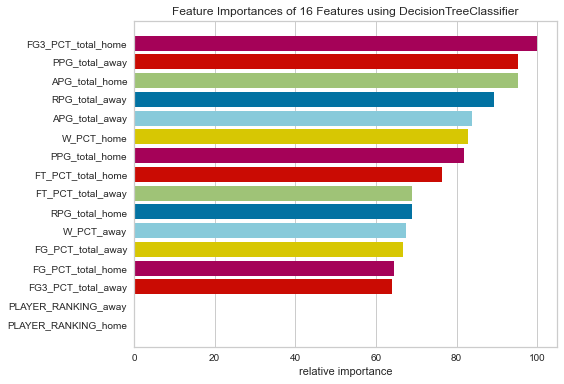

---------------------------------------------
Mean accuracy: 0.6054751158698641
Max accuracy: 0.6325802615933412
Min accuracy: 0.5629453681710214


In [44]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
})

## Try class weight balance

i=0


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.64
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       847
           1       0.53      0.51      0.52       508

    accuracy                           0.64      1355
   macro avg       0.62      0.62      0.62      1355
weighted avg       0.64      0.64      0.64      1355



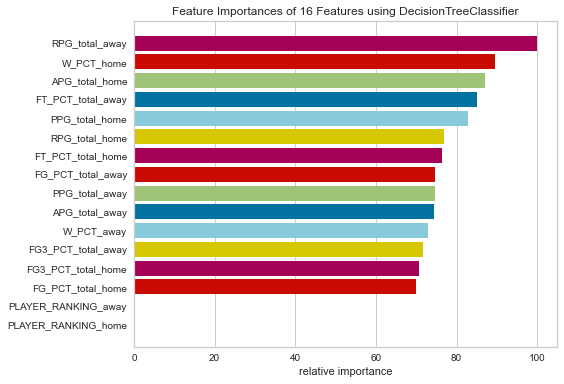

---------------------------------------------
i=1


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.65
              precision    recall  f1-score   support

           0       0.70      0.75      0.73       841
           1       0.54      0.47      0.50       514

    accuracy                           0.65      1355
   macro avg       0.62      0.61      0.61      1355
weighted avg       0.64      0.65      0.64      1355



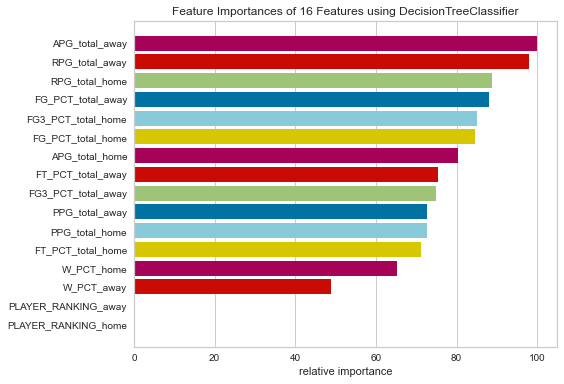

---------------------------------------------
i=2


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.63
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       853
           1       0.50      0.51      0.51       502

    accuracy                           0.63      1355
   macro avg       0.60      0.61      0.61      1355
weighted avg       0.63      0.63      0.63      1355



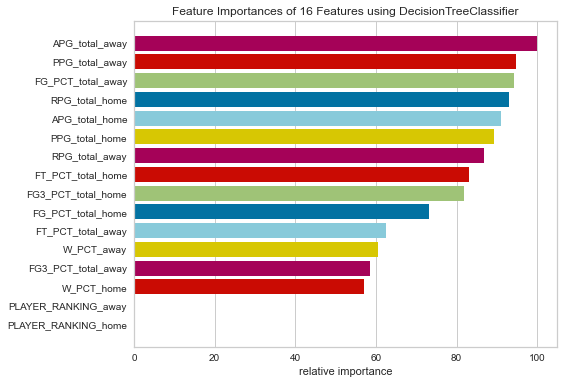

---------------------------------------------
i=3


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.64
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       849
           1       0.51      0.47      0.49       505

    accuracy                           0.64      1354
   macro avg       0.61      0.60      0.60      1354
weighted avg       0.63      0.64      0.63      1354



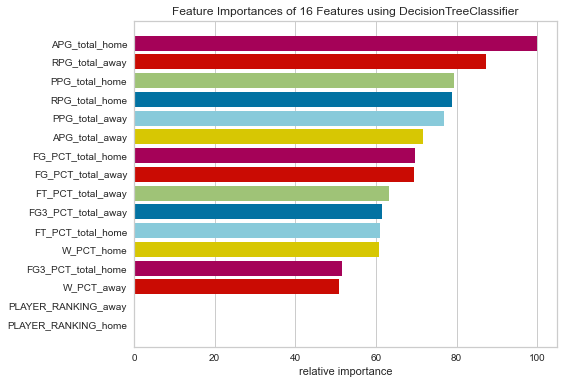

---------------------------------------------
i=4


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.65
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       860
           1       0.52      0.51      0.51       494

    accuracy                           0.65      1354
   macro avg       0.62      0.62      0.62      1354
weighted avg       0.65      0.65      0.65      1354



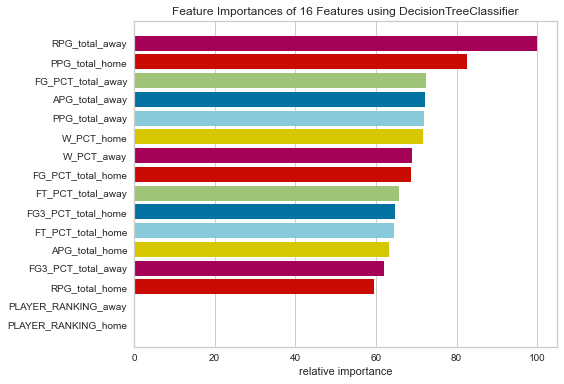

---------------------------------------------
Mean accuracy: 0.6388628472695362
Max accuracy: 0.6457564575645757
Min accuracy: 0.629520295202952
i=5


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.62
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       590
           1       0.52      0.52      0.52       390

    accuracy                           0.62       980
   macro avg       0.60      0.60      0.60       980
weighted avg       0.62      0.62      0.62       980



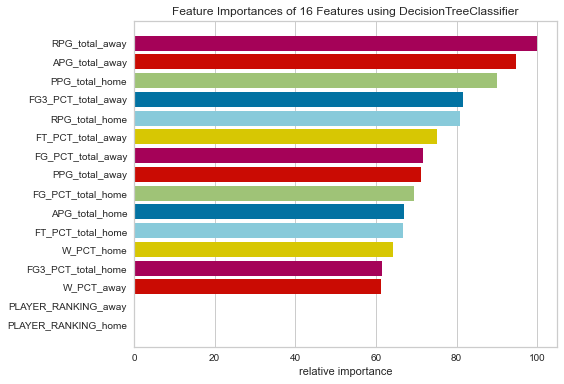

---------------------------------------------
i=6


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.59
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       600
           1       0.47      0.52      0.49       380

    accuracy                           0.59       980
   macro avg       0.57      0.57      0.57       980
weighted avg       0.59      0.59      0.59       980



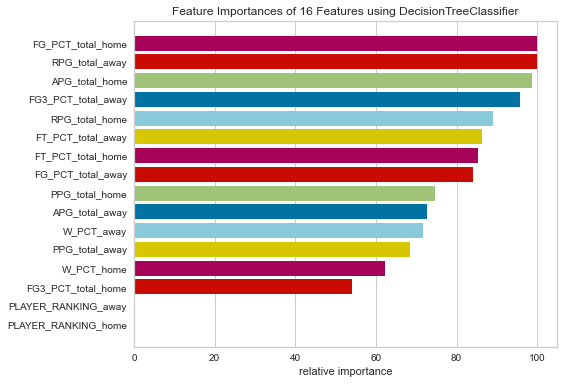

---------------------------------------------
i=7


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.62
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       571
           1       0.55      0.53      0.54       409

    accuracy                           0.62       980
   macro avg       0.61      0.61      0.61       980
weighted avg       0.62      0.62      0.62       980



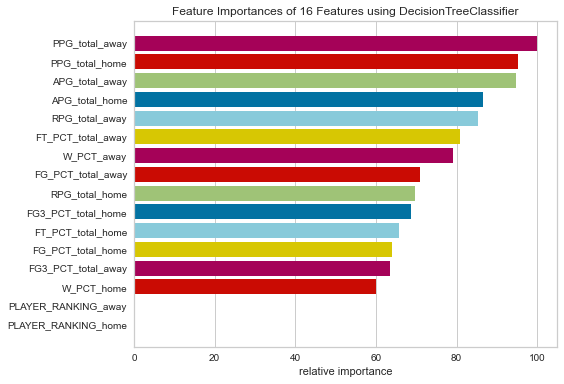

---------------------------------------------
i=8


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.62
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       600
           1       0.51      0.49      0.50       380

    accuracy                           0.62       980
   macro avg       0.60      0.59      0.59       980
weighted avg       0.62      0.62      0.62       980



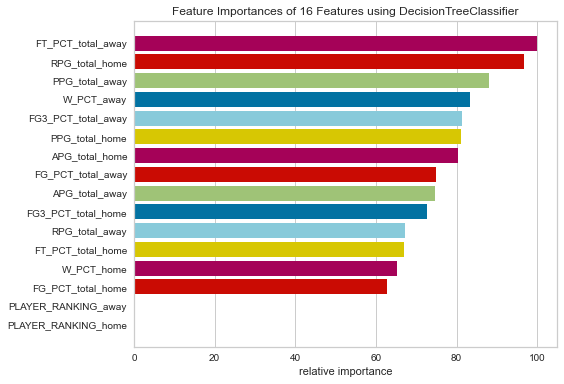

---------------------------------------------
i=9


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.59
              precision    recall  f1-score   support

           0       0.65      0.66      0.66       570
           1       0.52      0.50      0.51       410

    accuracy                           0.59       980
   macro avg       0.58      0.58      0.58       980
weighted avg       0.59      0.59      0.59       980



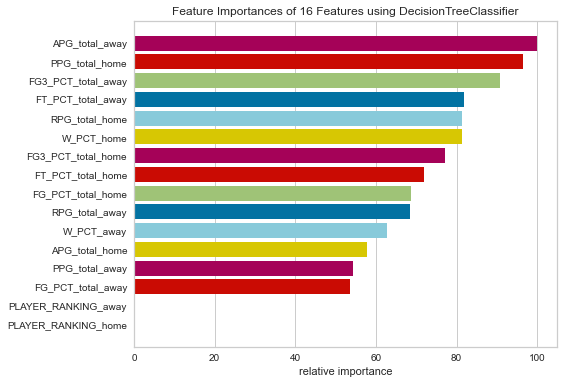

---------------------------------------------
Mean accuracy: 0.6099489795918367
Max accuracy: 0.6193877551020408
Min accuracy: 0.5857142857142857
i=10


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.58
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       324
           1       0.57      0.57      0.57       302

    accuracy                           0.58       626
   macro avg       0.58      0.58      0.58       626
weighted avg       0.58      0.58      0.58       626



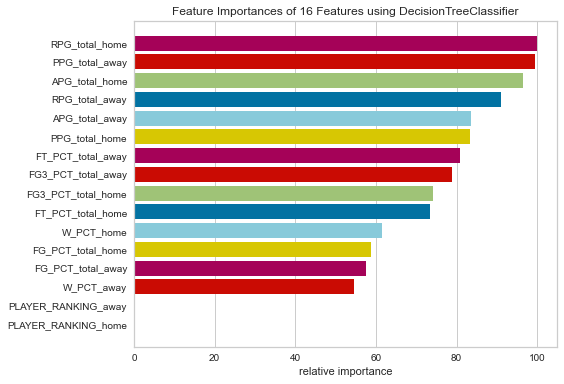

---------------------------------------------
i=11


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.60
              precision    recall  f1-score   support

           0       0.60      0.65      0.63       324
           1       0.59      0.54      0.57       302

    accuracy                           0.60       626
   macro avg       0.60      0.60      0.60       626
weighted avg       0.60      0.60      0.60       626



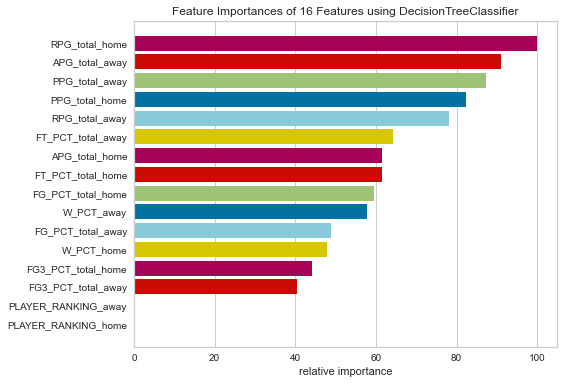

---------------------------------------------
i=12


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.61
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       341
           1       0.56      0.59      0.57       285

    accuracy                           0.61       626
   macro avg       0.60      0.60      0.60       626
weighted avg       0.61      0.61      0.61       626



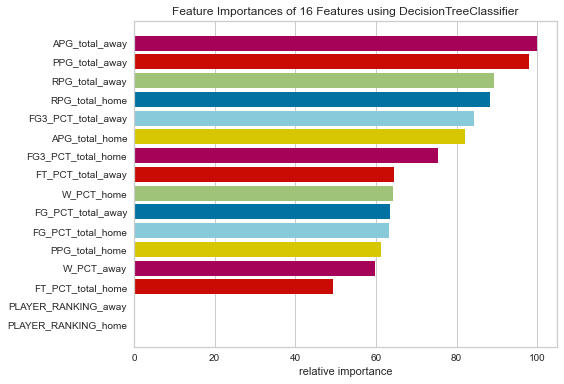

---------------------------------------------
i=13


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.61      0.59       322
           1       0.55      0.50      0.52       303

    accuracy                           0.56       625
   macro avg       0.56      0.55      0.55       625
weighted avg       0.56      0.56      0.56       625



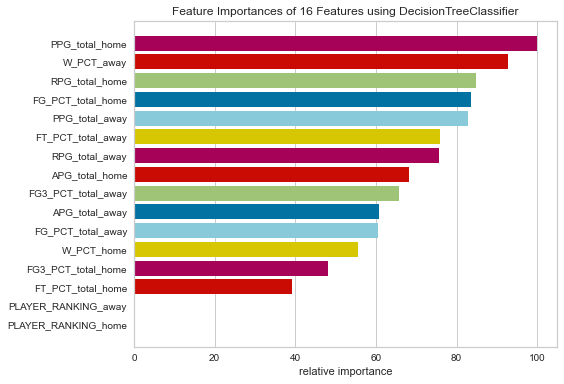

---------------------------------------------
i=14


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.55
              precision    recall  f1-score   support

           0       0.57      0.60      0.58       327
           1       0.53      0.50      0.52       298

    accuracy                           0.55       625
   macro avg       0.55      0.55      0.55       625
weighted avg       0.55      0.55      0.55       625



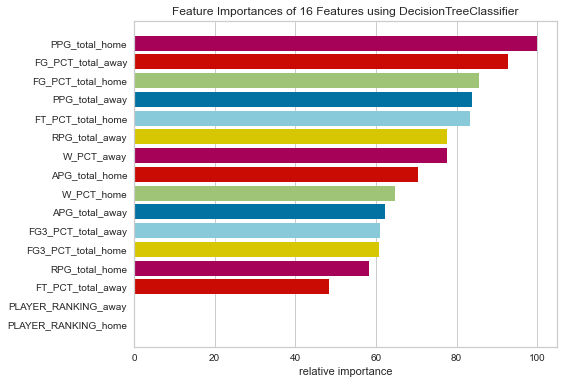

---------------------------------------------
Mean accuracy: 0.5860849840255591
Max accuracy: 0.6054313099041534
Min accuracy: 0.5568
i=15


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.58
              precision    recall  f1-score   support

           0       0.55      0.56      0.56       294
           1       0.61      0.60      0.60       341

    accuracy                           0.58       635
   macro avg       0.58      0.58      0.58       635
weighted avg       0.58      0.58      0.58       635



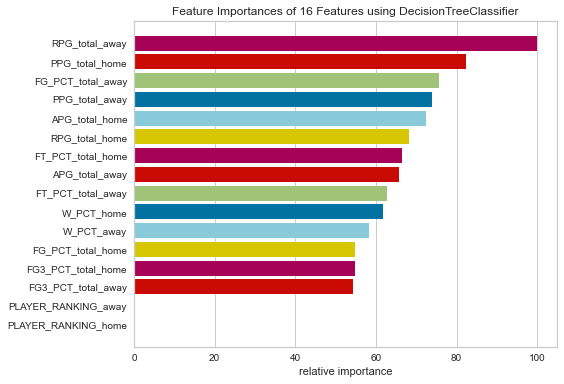

---------------------------------------------
i=16


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.53      0.55       315
           1       0.56      0.59      0.58       319

    accuracy                           0.56       634
   macro avg       0.56      0.56      0.56       634
weighted avg       0.56      0.56      0.56       634



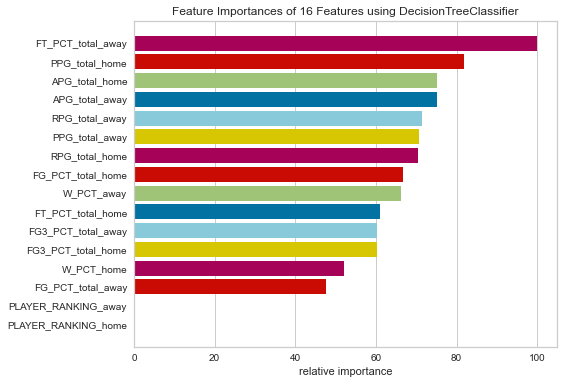

---------------------------------------------
i=17


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.62
              precision    recall  f1-score   support

           0       0.64      0.59      0.61       328
           1       0.59      0.65      0.62       306

    accuracy                           0.62       634
   macro avg       0.62      0.62      0.62       634
weighted avg       0.62      0.62      0.62       634



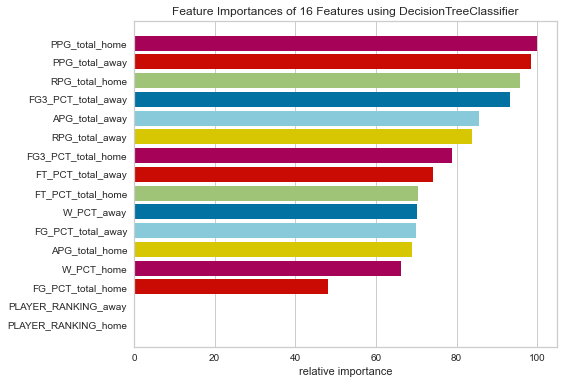

---------------------------------------------
i=18


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.61
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       299
           1       0.63      0.61      0.62       335

    accuracy                           0.61       634
   macro avg       0.61      0.61      0.61       634
weighted avg       0.61      0.61      0.61       634



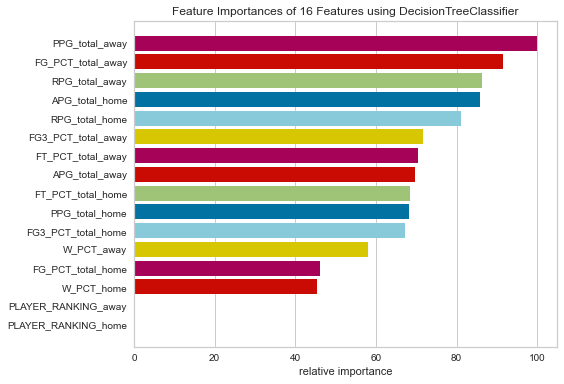

---------------------------------------------
i=19


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       313
           1       0.57      0.59      0.58       321

    accuracy                           0.57       634
   macro avg       0.57      0.57      0.57       634
weighted avg       0.57      0.57      0.57       634



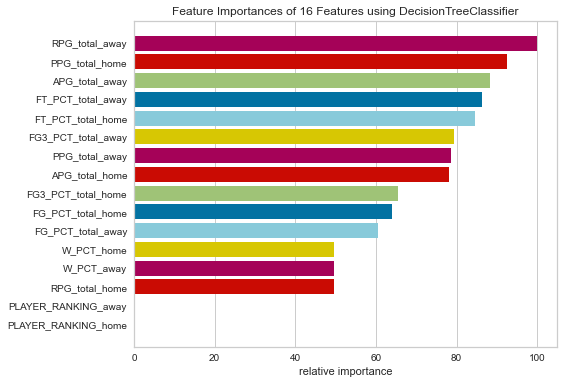

---------------------------------------------
Mean accuracy: 0.5916478302988153
Max accuracy: 0.6167192429022083
Min accuracy: 0.5630914826498423
i=20


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.63
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       584
           1       0.54      0.53      0.53       386

    accuracy                           0.63       970
   macro avg       0.61      0.61      0.61       970
weighted avg       0.63      0.63      0.63       970



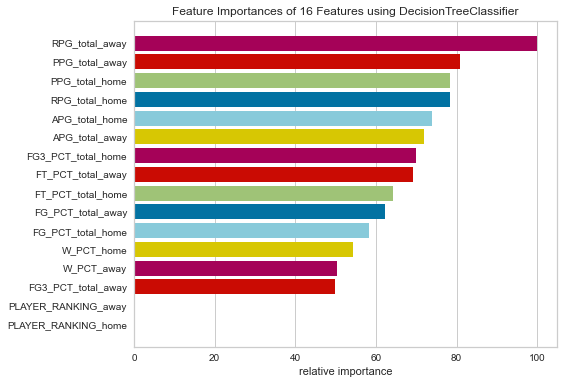

---------------------------------------------
i=21


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.60
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       571
           1       0.51      0.47      0.49       399

    accuracy                           0.60       970
   macro avg       0.58      0.58      0.58       970
weighted avg       0.59      0.60      0.60       970



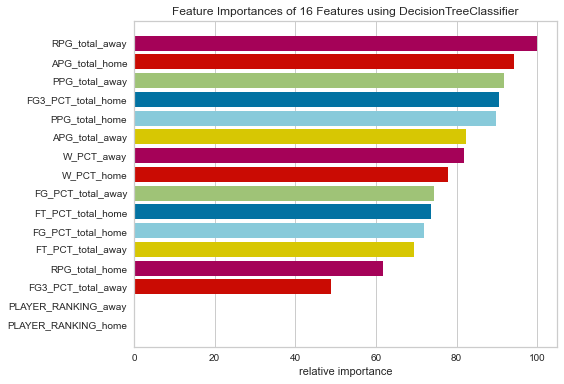

---------------------------------------------
i=22


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.60
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       558
           1       0.53      0.55      0.54       411

    accuracy                           0.60       969
   macro avg       0.59      0.59      0.59       969
weighted avg       0.60      0.60      0.60       969



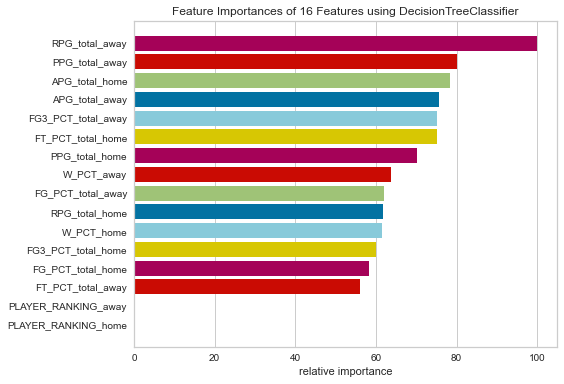

---------------------------------------------
i=23


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.62
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       597
           1       0.50      0.51      0.51       372

    accuracy                           0.62       969
   macro avg       0.60      0.60      0.60       969
weighted avg       0.62      0.62      0.62       969



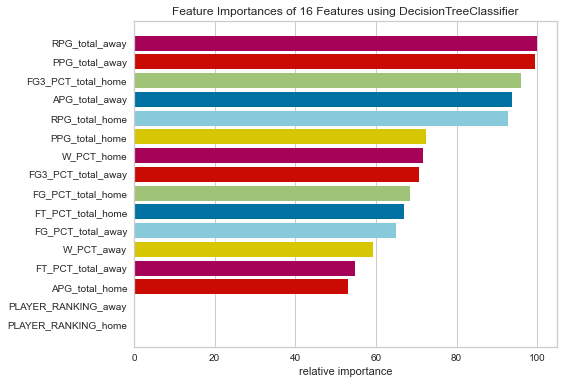

---------------------------------------------
i=24


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.60
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       556
           1       0.53      0.49      0.51       413

    accuracy                           0.60       969
   macro avg       0.59      0.59      0.59       969
weighted avg       0.60      0.60      0.60       969



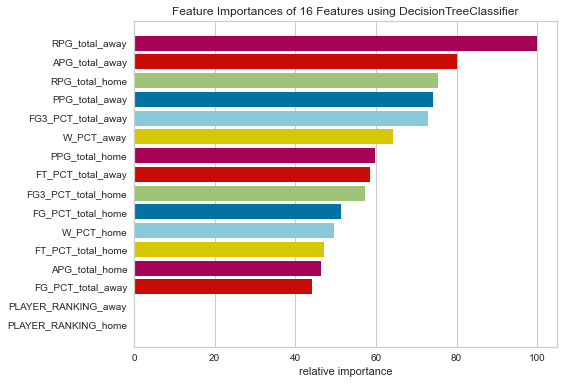

---------------------------------------------
Mean accuracy: 0.6121700552168778
Max accuracy: 0.6298969072164948
Min accuracy: 0.5989690721649484
i=25


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.58
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       484
           1       0.50      0.49      0.50       358

    accuracy                           0.58       842
   macro avg       0.57      0.57      0.57       842
weighted avg       0.58      0.58      0.58       842



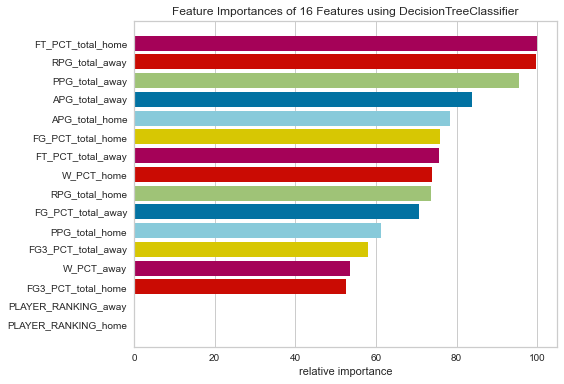

---------------------------------------------
i=26


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.59
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       489
           1       0.51      0.49      0.50       353

    accuracy                           0.59       842
   macro avg       0.58      0.58      0.58       842
weighted avg       0.59      0.59      0.59       842



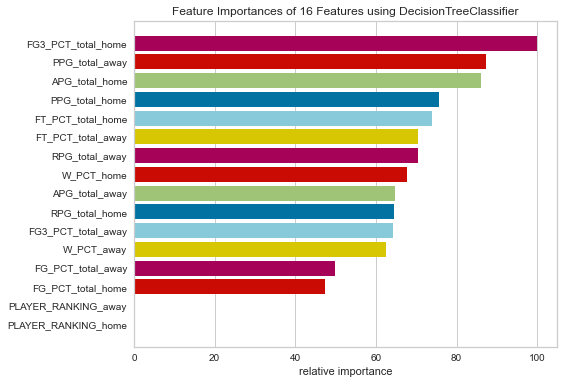

---------------------------------------------
i=27


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.60
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       472
           1       0.54      0.53      0.53       369

    accuracy                           0.60       841
   macro avg       0.59      0.59      0.59       841
weighted avg       0.60      0.60      0.60       841



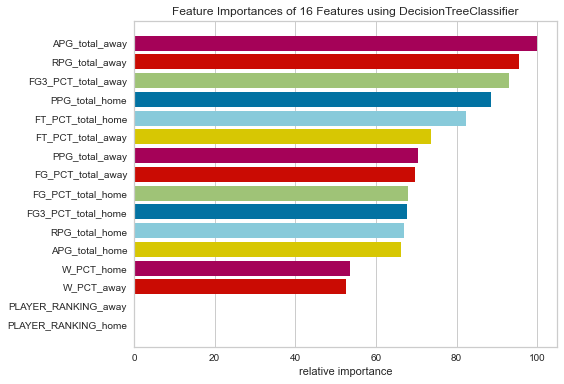

---------------------------------------------
i=28


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.60
              precision    recall  f1-score   support

           0       0.67      0.66      0.67       513
           1       0.49      0.50      0.49       328

    accuracy                           0.60       841
   macro avg       0.58      0.58      0.58       841
weighted avg       0.60      0.60      0.60       841



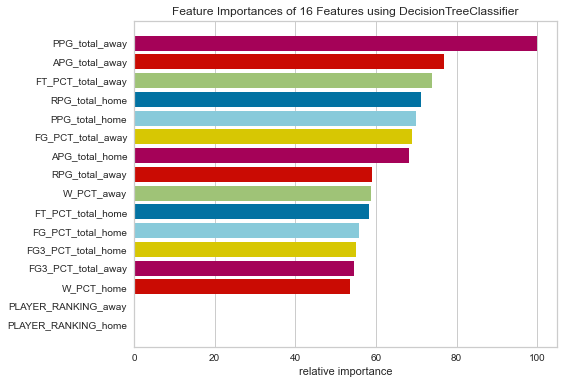

---------------------------------------------
i=29


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.61
              precision    recall  f1-score   support

           0       0.65      0.68      0.66       467
           1       0.57      0.53      0.55       374

    accuracy                           0.61       841
   macro avg       0.61      0.61      0.61       841
weighted avg       0.61      0.61      0.61       841



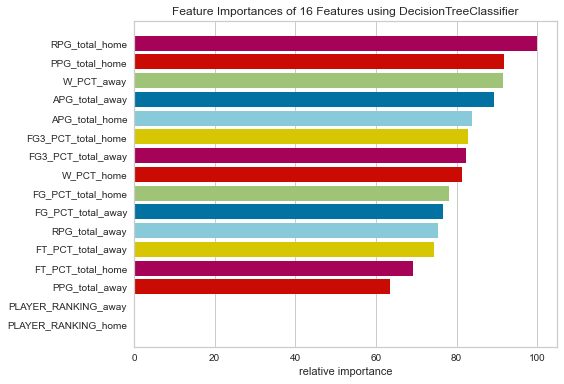

---------------------------------------------
Mean accuracy: 0.5909130065158263
Max accuracy: 0.5980975029726516
Min accuracy: 0.5771971496437055


In [45]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'class_weight': ['balanced', None],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy'],
})